In [79]:
import pandas as pd
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [80]:
sys.path.insert(0,"..")
from nextbike.preprocessing.Preprocessor import Preprocessor

In [81]:
bremen= Preprocessor("../data")


In [4]:
Preprocessor.clean_dataset(bremen)

Cleaning data set...
Filtered for city of Bremen.
Duplicates of subset [datetime, bike number] dropped.
Index reset.
Order of columns rearranged.
Null values dropped.
Cleaned data set saved in data/processed as bremen_cleaned.csv.
Cleaning data sucessfully finished.


In [82]:
bremen_cleaned = Preprocessor._get_cleaned(bremen)

In [83]:
bremen_cleaned.info()
bremen_cleaned.head()
bremen_cleaned.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654495 entries, 0 to 654494
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime      654495 non-null  datetime64[ns]
 1   b_number      654495 non-null  int64         
 2   b_bike_type   654495 non-null  int64         
 3   p_spot        654495 non-null  bool          
 4   p_place_type  654495 non-null  int64         
 5   trip          654495 non-null  object        
 6   p_uid         654495 non-null  int64         
 7   p_bikes       654495 non-null  int64         
 8   p_name        654495 non-null  object        
 9   p_number      654495 non-null  float64       
 10  p_bike        654495 non-null  bool          
 11  p_lat         654495 non-null  float64       
 12  p_lng         654495 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 56.2+ MB


datetime        186327
b_number           443
b_bike_type          2
p_spot               2
p_place_type         3
trip                 4
p_uid           157157
p_bikes             32
p_name            5973
p_number            79
p_bike               2
p_lat            25057
p_lng            85611
dtype: int64

In [7]:
Preprocessor.create_trips(bremen)

Creating Trips from cleaned bike pings...


Finished rows:: 100%|██████████| 654495/654495 [05:10<00:00, 2105.02it/s]


Trips data set saved in data/processed as trips.csv.
Creating trips from data completed successfully.


In [84]:
bremen_trips = pd.read_csv("../data/processed/trips.csv")

In [85]:
display(bremen_trips.head(), bremen_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143677 entries, 0 to 143676
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bike            143677 non-null  int64  
 1   bike_type       143677 non-null  int64  
 2   identification  143677 non-null  int64  
 3   start_time      143677 non-null  object 
 4   end_time        143677 non-null  object 
 5   duration_sec    143677 non-null  float64
 6   start_lng       143677 non-null  float64
 7   start_lat       143677 non-null  float64
 8   end_lng         143677 non-null  float64
 9   end_lat         143677 non-null  float64
 10  start_place     143677 non-null  float64
 11  end_place       143677 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 13.2+ MB


bike  bike_type  identification           start_time             end_time  \
0  20507         29        14776184  2019-04-21 17:34:00  2019-04-21 17:47:00   
1  20507         29        16155376  2019-05-23 15:33:00  2019-05-23 15:40:00   
2  20507         29        16186293  2019-05-23 16:12:00  2019-05-24 08:52:00   
3  20507         29        10278649  2019-05-24 09:11:00  2019-05-24 14:17:00   
4  20507         29        10278729  2019-06-14 22:30:00  2019-06-14 22:38:00   

   duration_sec  start_lng  start_lat   end_lng    end_lat  start_place  \
0         780.0   8.884911  53.078923  8.899906  53.078711       2985.0   
1         420.0   8.884911  53.078923  8.876828  53.078004       2985.0   
2       60000.0   8.876822  53.078036  8.942664  53.084449          0.0   
3       18360.0   8.942766  53.084507  8.884911  53.078923          0.0   
4         480.0   8.884911  53.078923  8.876003  53.074731       2985.0   

   end_place  
0        0.0  
1        0.0  
2        0.0  
3     2985.0  
4     2989.0

None

In [86]:
# sort starting time
bremen_trips = bremen_trips.sort_values(by=['start_time'], ascending=True)

In [87]:
bremen_trips.head()

bike  bike_type  identification           start_time  \
50911   20685         71        12099440  2019-01-20 00:13:00   
126358  20935         71         7873316  2019-01-20 00:35:00   
30807   20617         71        12099749  2019-01-20 00:40:00   
81651   20795         71        12099872  2019-01-20 00:47:00   
123835  20927         71        12100199  2019-01-20 01:07:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
50911   2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
126358  2019-01-25 08:00:00      458700.0   8.816798  53.072448  8.811472   
30807   2019-01-20 00:44:00         240.0   8.801623  53.067878  8.793217   
81651   2019-01-20 00:54:00         420.0   8.814744  53.084841  8.801135   
123835  2019-01-20 01:15:00         480.0   8.815254  53.084302  8.806666   

          end_lat  start_place  end_place  
50911   53.084196          0.0        0.0  
126358  53.083167          0.0     2946.0  
30807   53.064244          0.0        0.0  
81651   53.094596          0.0        0.0  
123835  53.094964          0.0        0.0

In [88]:
# convert column to datetime
bremen_trips["start_time"] = pd.to_datetime(bremen_trips["start_time"])

In [89]:
# create new features/columns: month, weekday, date of booking
for col in ['start_time']:
    bremen_trips['month'] = pd.DatetimeIndex(bremen_trips['start_time']).month
    bremen_trips['booking_date'] = bremen_trips.start_time.dt.date
    bremen_trips['weekdays'] = pd.DatetimeIndex(bremen_trips['start_time']).weekday


In [90]:
display(bremen_trips.head(),bremen_trips.tail())

bike  bike_type  identification          start_time  \
50911   20685         71        12099440 2019-01-20 00:13:00   
126358  20935         71         7873316 2019-01-20 00:35:00   
30807   20617         71        12099749 2019-01-20 00:40:00   
81651   20795         71        12099872 2019-01-20 00:47:00   
123835  20927         71        12100199 2019-01-20 01:07:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
50911   2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
126358  2019-01-25 08:00:00      458700.0   8.816798  53.072448  8.811472   
30807   2019-01-20 00:44:00         240.0   8.801623  53.067878  8.793217   
81651   2019-01-20 00:54:00         420.0   8.814744  53.084841  8.801135   
123835  2019-01-20 01:15:00         480.0   8.815254  53.084302  8.806666   

          end_lat  start_place  end_place  month booking_date  weekdays  
50911   53.084196          0.0        0.0      1   2019-01-20         6  
126358  53.083167          0.0     2946.0      1   2019-01-20         6  
30807   53.064244          0.0        0.0      1   2019-01-20         6  
81651   53.094596          0.0        0.0      1   2019-01-20         6  
123835  53.094964          0.0        0.0      1   2019-01-20         6

bike  bike_type  identification          start_time  \
135681  20965         71        26519958 2019-12-31 23:41:00   
71959   20757         71        26520201 2019-12-31 23:44:00   
129485  20946         71        26520104 2019-12-31 23:48:00   
76741   20776         71        26520101 2019-12-31 23:48:00   
70657   20751         71        26520148 2019-12-31 23:51:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
135681  2019-12-31 23:49:00         480.0   8.871098  53.077498  8.872118   
71959   2019-12-31 23:59:00         900.0   8.821334  53.081942  8.806207   
129485  2019-12-31 23:55:00         420.0   8.779235  53.078581  8.790776   
76741   2019-12-31 23:55:00         420.0   8.779235  53.078581  8.790580   
70657   2019-12-31 23:57:00         360.0   8.815570  53.054449  8.811623   

          end_lat  start_place  end_place  month booking_date  weekdays  
135681  53.082471          0.0        0.0     12   2019-12-31         1  
71959   53.078418          0.0        0.0     12   2019-12-31         1  
129485  53.078867       2966.0        0.0     12   2019-12-31         1  
76741   53.078867       2966.0        0.0     12   2019-12-31         1  
70657   53.060347          0.0        0.0     12   2019-12-31         1

# Analyzing trip duration in sum

In [91]:
bremen_trips["duration_sec"].describe().astype(int)   # kann mir nicht so viel unter Sekunden auf anhib vorstellen

count      143677
mean        14940
std        222884
min           120
25%           480
50%           780
75%          1320
max      21399300
Name: duration_sec, dtype: int64

In [92]:
# create duration min, to better understand the data
bremen_trips["duration_min"] = bremen_trips["duration_sec"]/60

In [93]:
bremen_trips["duration_min"].describe().astype(int)

count    143677
mean        249
std        3714
min           2
25%           8
50%          13
75%          22
max      356655
Name: duration_min, dtype: int64

- As we can see here, we have at least one outlier (max 356.655 minutes). 
- 75% of the trips have a duration of ≤ 22 minutes, but the mean is 249 minutes, while the median is 13 minutes. This means, that we have a positive skew, which indicates outliers as well
- Additionally, we have a high standard deviation of 3714 minutes. 

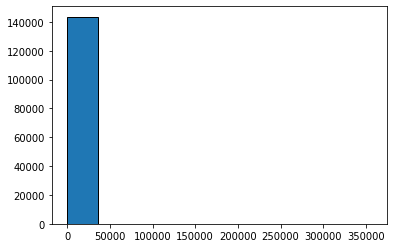

In [94]:
#Booking period (rented_minutes) for each booking -> frequency distribution
plt.hist(bremen_trips["duration_min"], bins = 10,edgecolor='k')
plt.show()

In [95]:
bremen_trips[bremen_trips["duration_min"]== 356655] 
## Question: Is this a booking mistake? Who rents a bike for 8 months?

bike  bike_type  identification          start_time  \
134406  20961         71         7873893 2019-03-10 20:08:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
134406  2019-11-13 12:23:00    21399300.0   8.805269  53.091262  8.779235   

          end_lat  start_place  end_place  month booking_date  weekdays  \
134406  53.078581          0.0     2966.0      3   2019-03-10         6   

        duration_min  
134406      356655.0

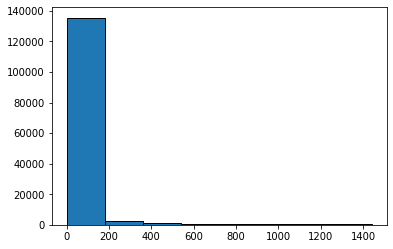

In [96]:
#lets have a look at the distribution of bookings with a duration less than 1 day
subsetRentedminutes = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 1441]  # 14726 entries in this subset
plt.hist(subsetRentedminutes["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

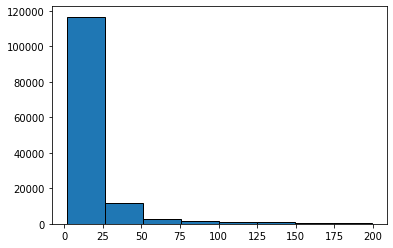

In [97]:
#lets have a look at the distribution of bookings with a duration less than 200 minutes
subsetRentedminutes_200 = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 200]
plt.hist(subsetRentedminutes_200["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

In [98]:
subsetRentedminutes_200.info()
len(bremen_trips)-len(subsetRentedminutes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135886 entries, 50911 to 70657
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   bike            135886 non-null  int64         
 1   bike_type       135886 non-null  int64         
 2   identification  135886 non-null  int64         
 3   start_time      135886 non-null  datetime64[ns]
 4   end_time        135886 non-null  object        
 5   duration_sec    135886 non-null  float64       
 6   start_lng       135886 non-null  float64       
 7   start_lat       135886 non-null  float64       
 8   end_lng         135886 non-null  float64       
 9   end_lat         135886 non-null  float64       
 10  start_place     135886 non-null  float64       
 11  end_place       135886 non-null  float64       
 12  month           135886 non-null  int64         
 13  booking_date    135886 non-null  object        
 14  weekdays        135886 non-null  

2951

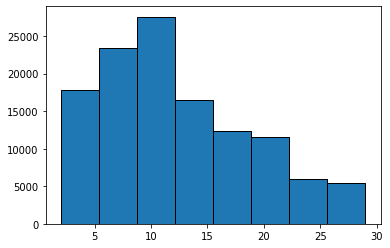

In [99]:
#lets have a look at the distribution of bookings with a duration less than 30 minutes
subsetRentedminutes_30 = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 30]
plt.hist(subsetRentedminutes_30["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

In [100]:
subsetRentedminutes_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120522 entries, 50911 to 70657
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   bike            120522 non-null  int64         
 1   bike_type       120522 non-null  int64         
 2   identification  120522 non-null  int64         
 3   start_time      120522 non-null  datetime64[ns]
 4   end_time        120522 non-null  object        
 5   duration_sec    120522 non-null  float64       
 6   start_lng       120522 non-null  float64       
 7   start_lat       120522 non-null  float64       
 8   end_lng         120522 non-null  float64       
 9   end_lat         120522 non-null  float64       
 10  start_place     120522 non-null  float64       
 11  end_place       120522 non-null  float64       
 12  month           120522 non-null  int64         
 13  booking_date    120522 non-null  object        
 14  weekdays        120522 non-null  

Only 2951 trips are longer than 1 day. 135.886 trips take less than 200 minutes.
If we have an even closer look we can see that 120.522 bookings have a duration of less than 30 minutes.
The last graphic displays the distribution of bookings less than 30 minutes and we can see, that half of the trips are  short trips up to approximately 10-15 minutes.

In [101]:
#Sum rented minutes a day
day_rented_minutes = (bremen_trips.groupby('booking_date')
                                 .duration_min.sum()
                              )
day_rented_minutes.describe().astype(int)



count        312
mean      114671
std       156417
min         1455
25%        30569
50%        68031
75%       127491
max      1747483
Name: duration_min, dtype: int64

We have only bookings on 312 days of the year, many days are missing totally.
Here, we can see again that the mean is less robust next to the median, we have a positive skew.

In [104]:
#defining a lineplot: data = dataset; xlabel; ylabel; filename = give it a filename, to save the lineplot as .png
def lineplot (data, xlabel, ylabel, filename): 
    Fig_1 = plt.figure(figsize=(15,6),dpi = 300)
    ax = Fig_1.add_axes([0,0,1,1])

    ax.plot(data)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel) 
    plt.savefig("../reports/figures/"+ str(filename)+".png", bbox_inches='tight')

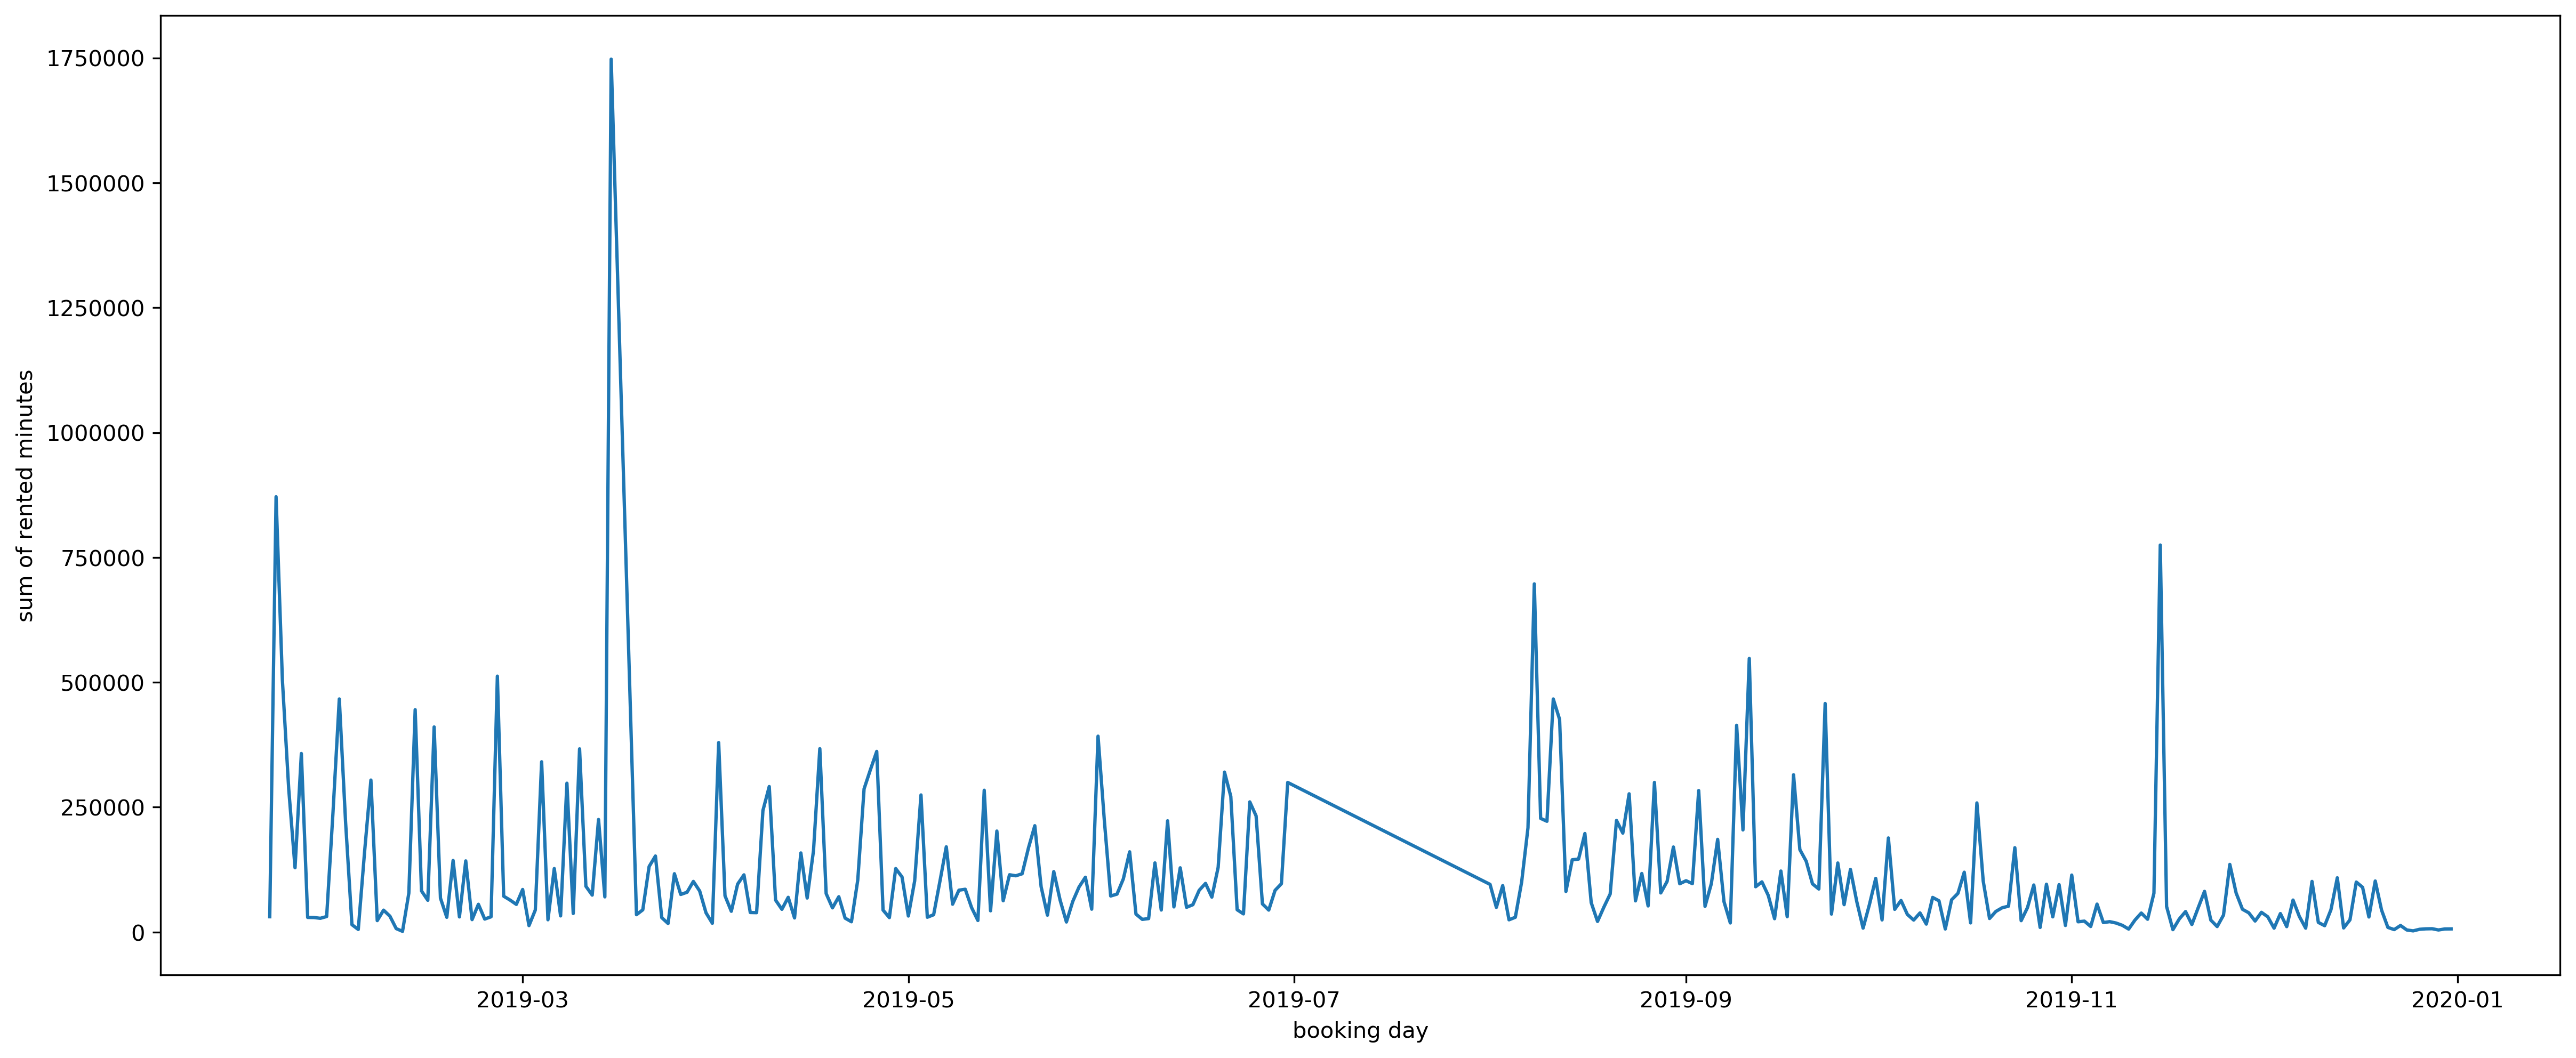

In [147]:
lineplot(day_rented_minutes,"booking day", "sum of rented minutes", "daily_rented_minutes")

We cannot see a seasonal trend here, especially because of some outliers. Let's have a closer look on this:

In [106]:
#Sum rented minutes a day for trips with a duration <1 day

sub_day_rented_minutes = (subsetRentedminutes.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes.describe().astype(int)

count      312
mean     17173
std       9885
min       1455
25%       9859
50%      15265
75%      22762
max      89668
Name: duration_min, dtype: int64

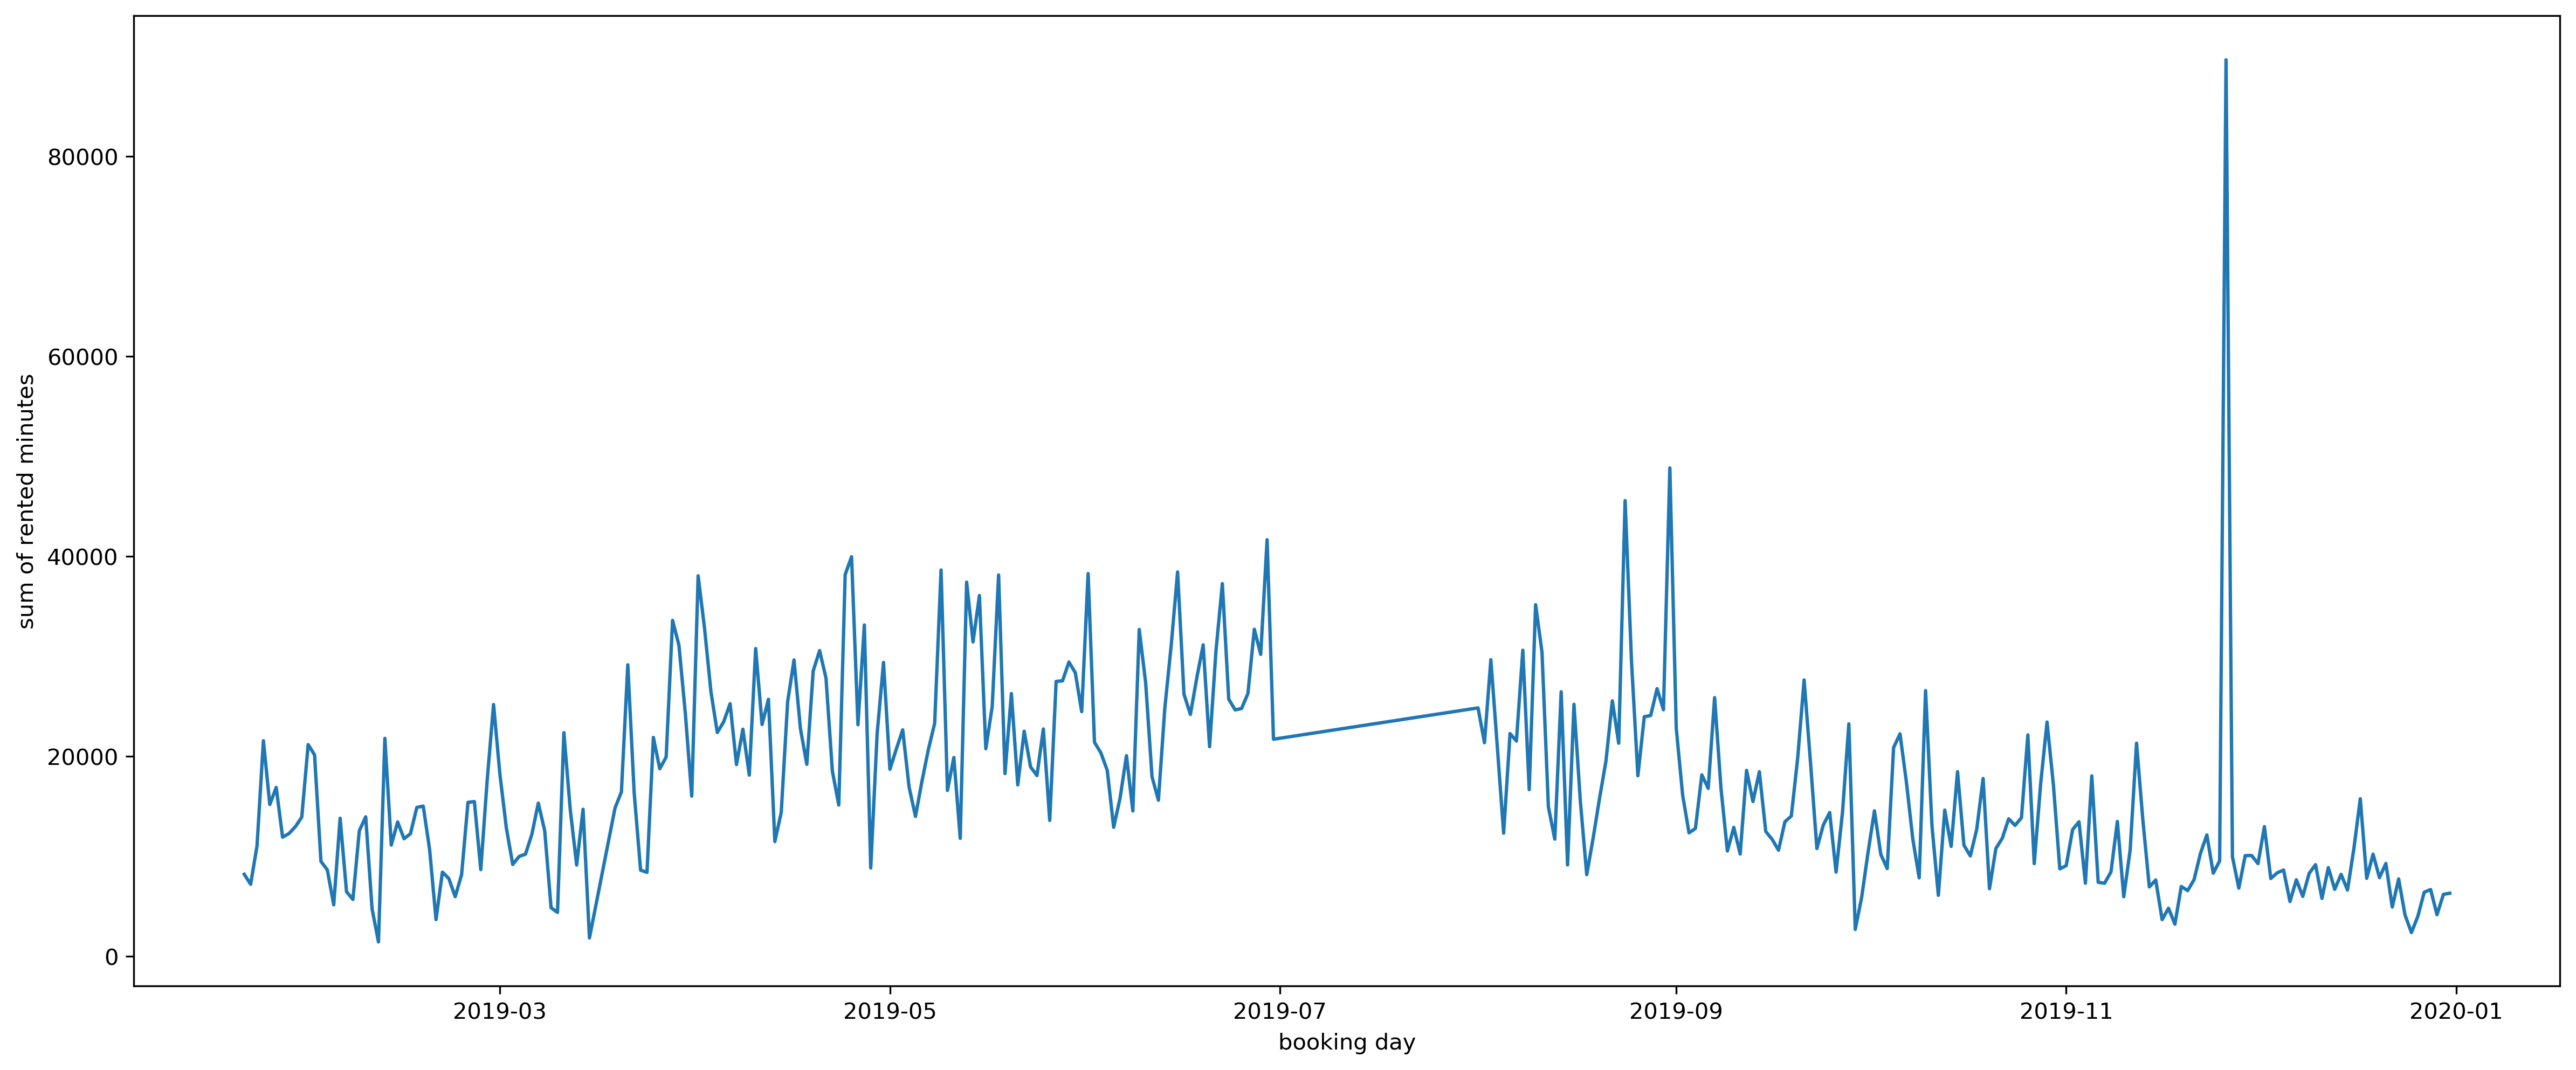

In [107]:
#Lineplot daily rented minutes subset
lineplot(sub_day_rented_minutes,"booking day", "sum of rented minutes", "sub_day_rented_minutes" )

This graph already shows a seasonal trend. We still have an outlier.

In [108]:
#Sum rented minutes a day <200 min duration
sub_day_rented_minutes2 = (subsetRentedminutes_200.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes2.describe().astype(int)

count      312
mean      8106
std       3805
min       1344
25%       5485
50%       7412
75%      10387
max      23434
Name: duration_min, dtype: int64

In [109]:
#Sum rented minutes a day <30 min duration
sub_day_rented_minutes3 = (subsetRentedminutes_30.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes3.describe().astype(int)

count      312
mean      4764
std       1851
min        517
25%       3511
50%       4785
75%       6044
max      10706
Name: duration_min, dtype: int64

If we have a look at the subsets of rented minutes below 200 or 30 minutes, we see that mean and median are closer to each other, which implicates a less skewed distribution. 
Additionally, the standard deviation is not higher than the mean anymore. 

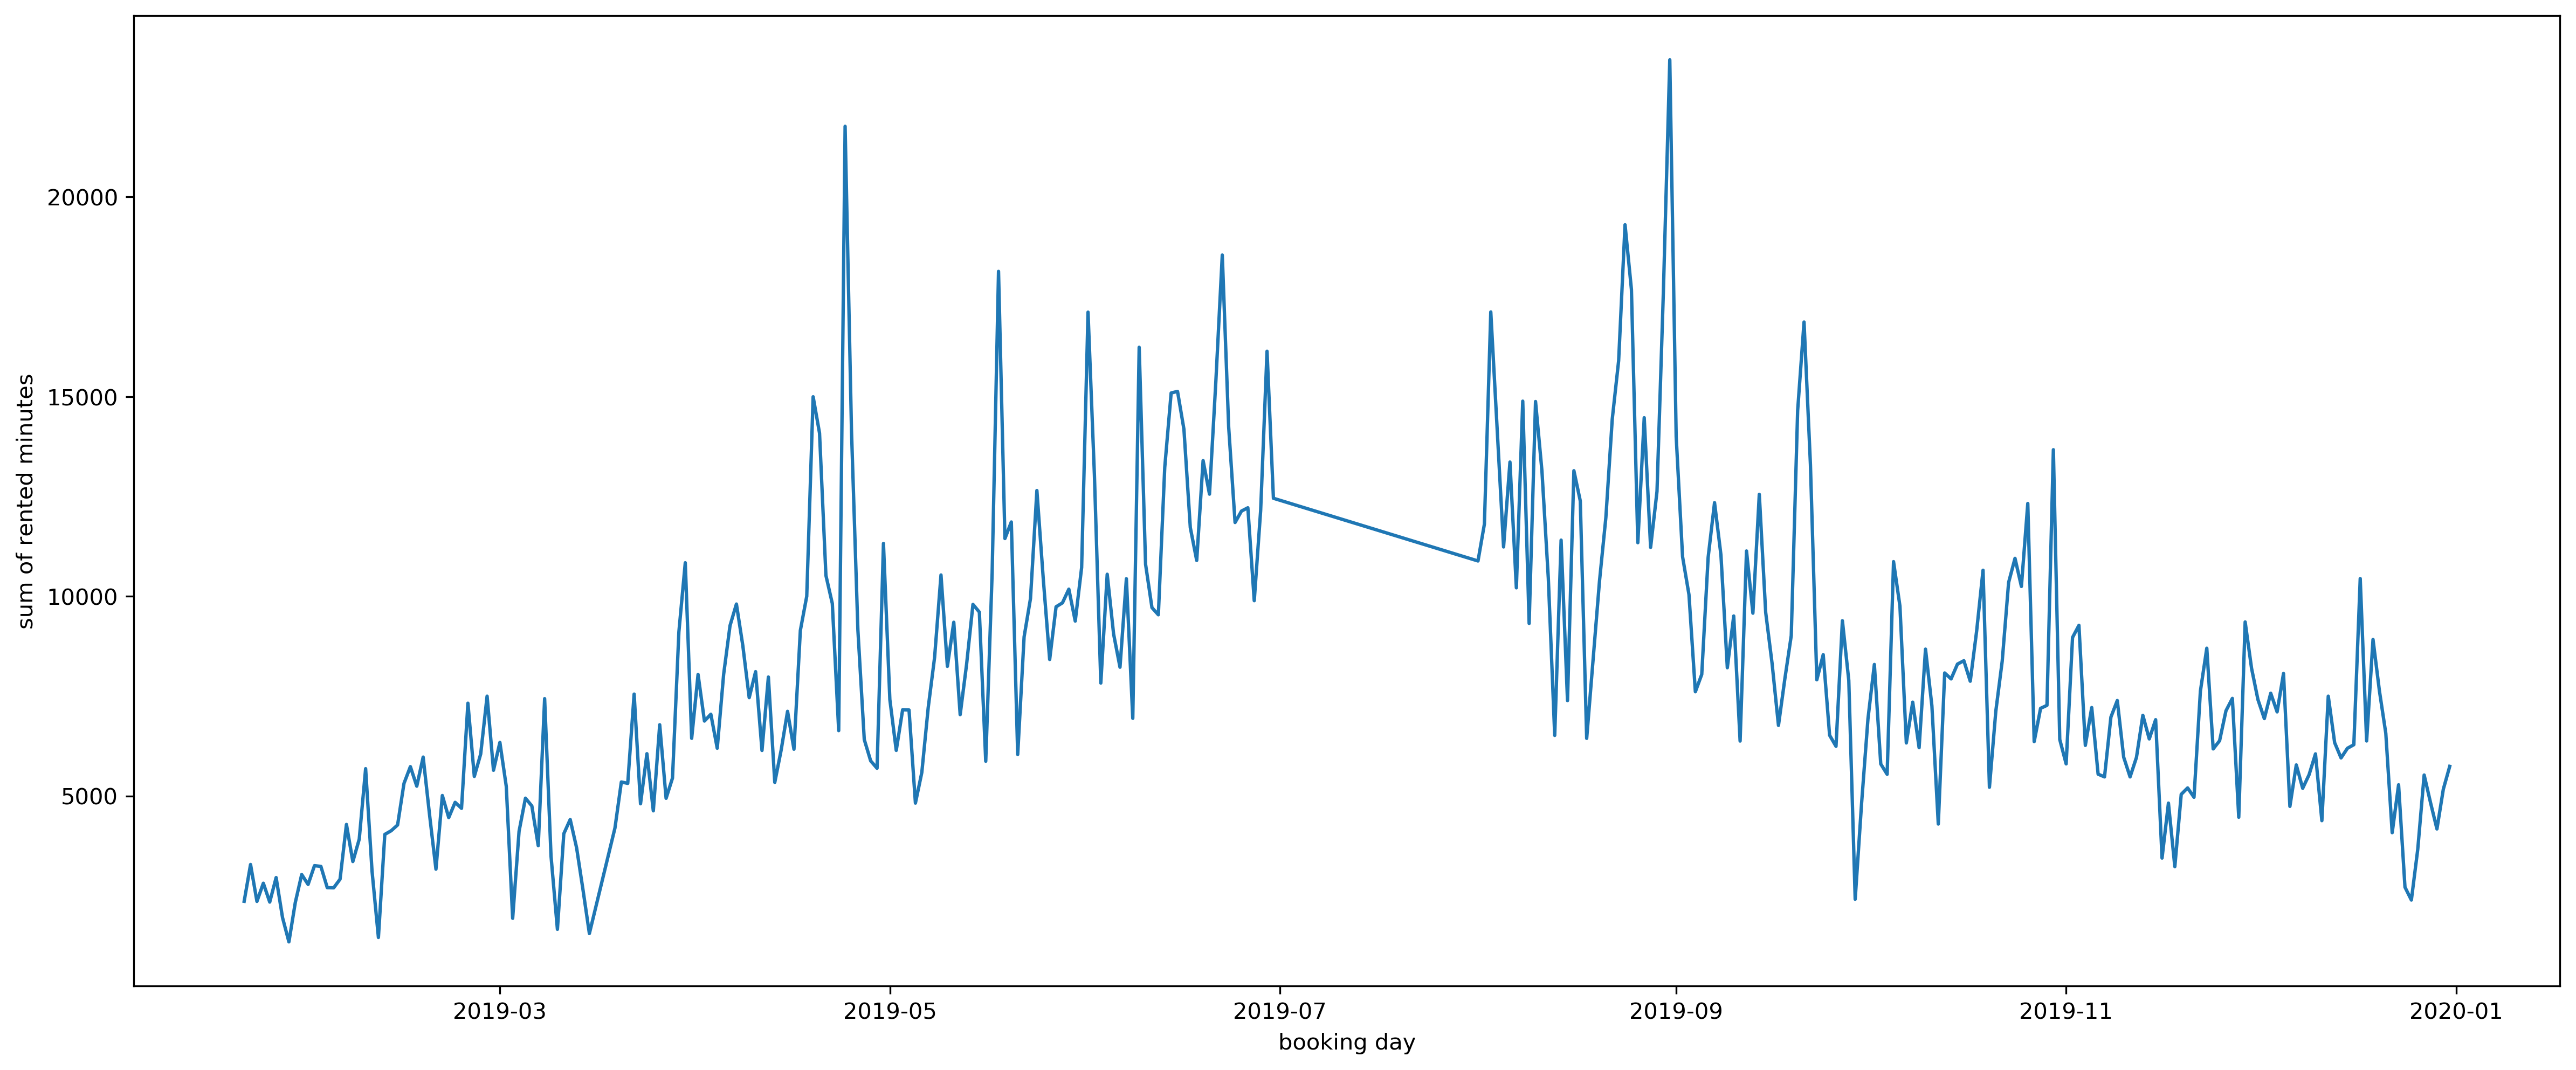

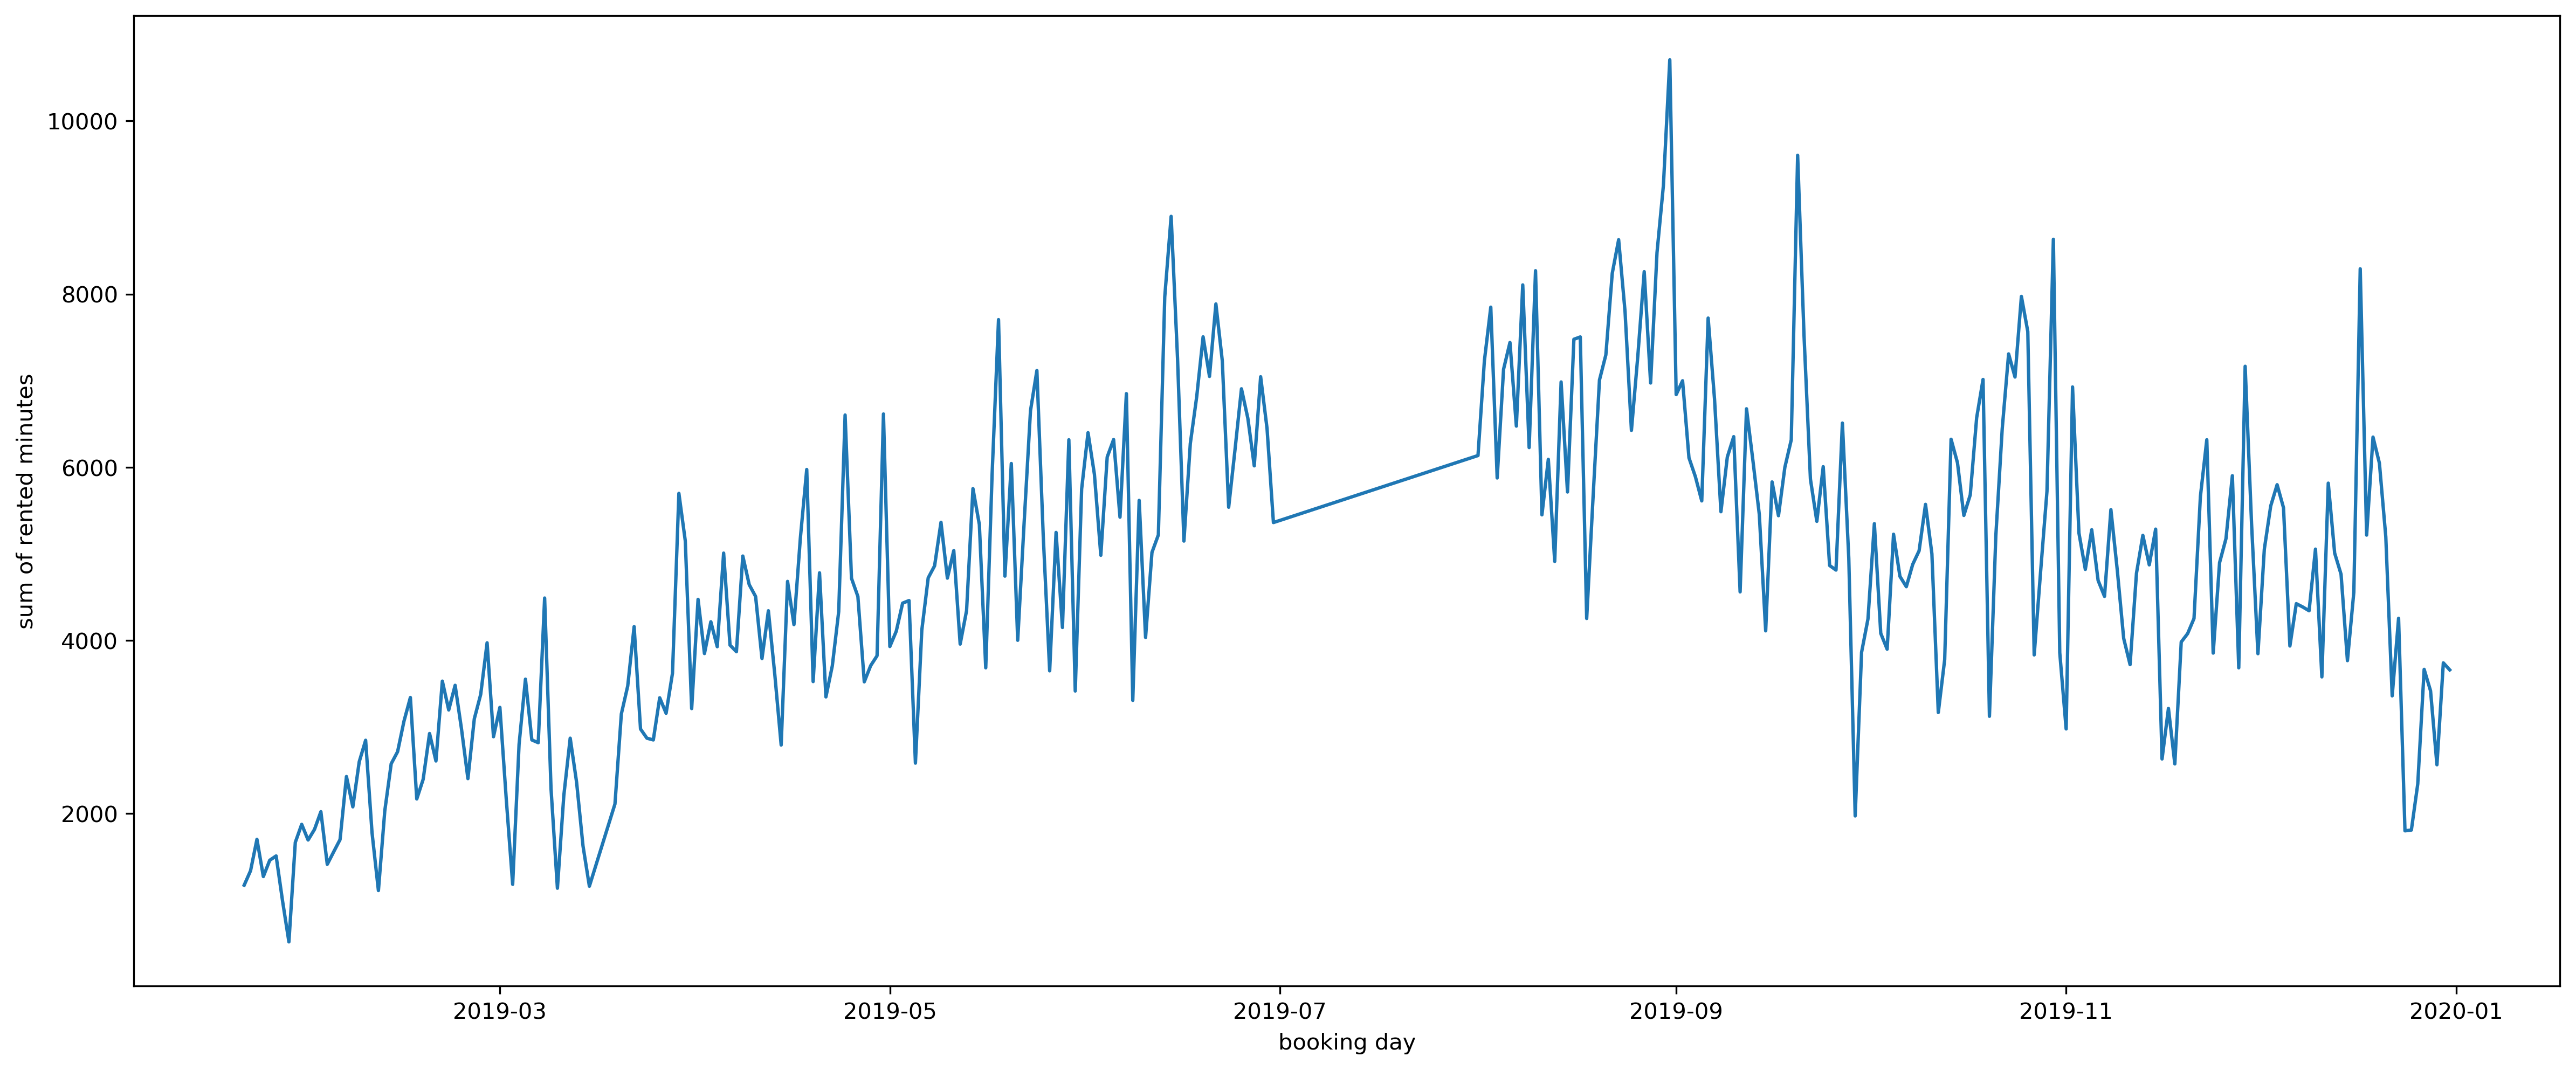

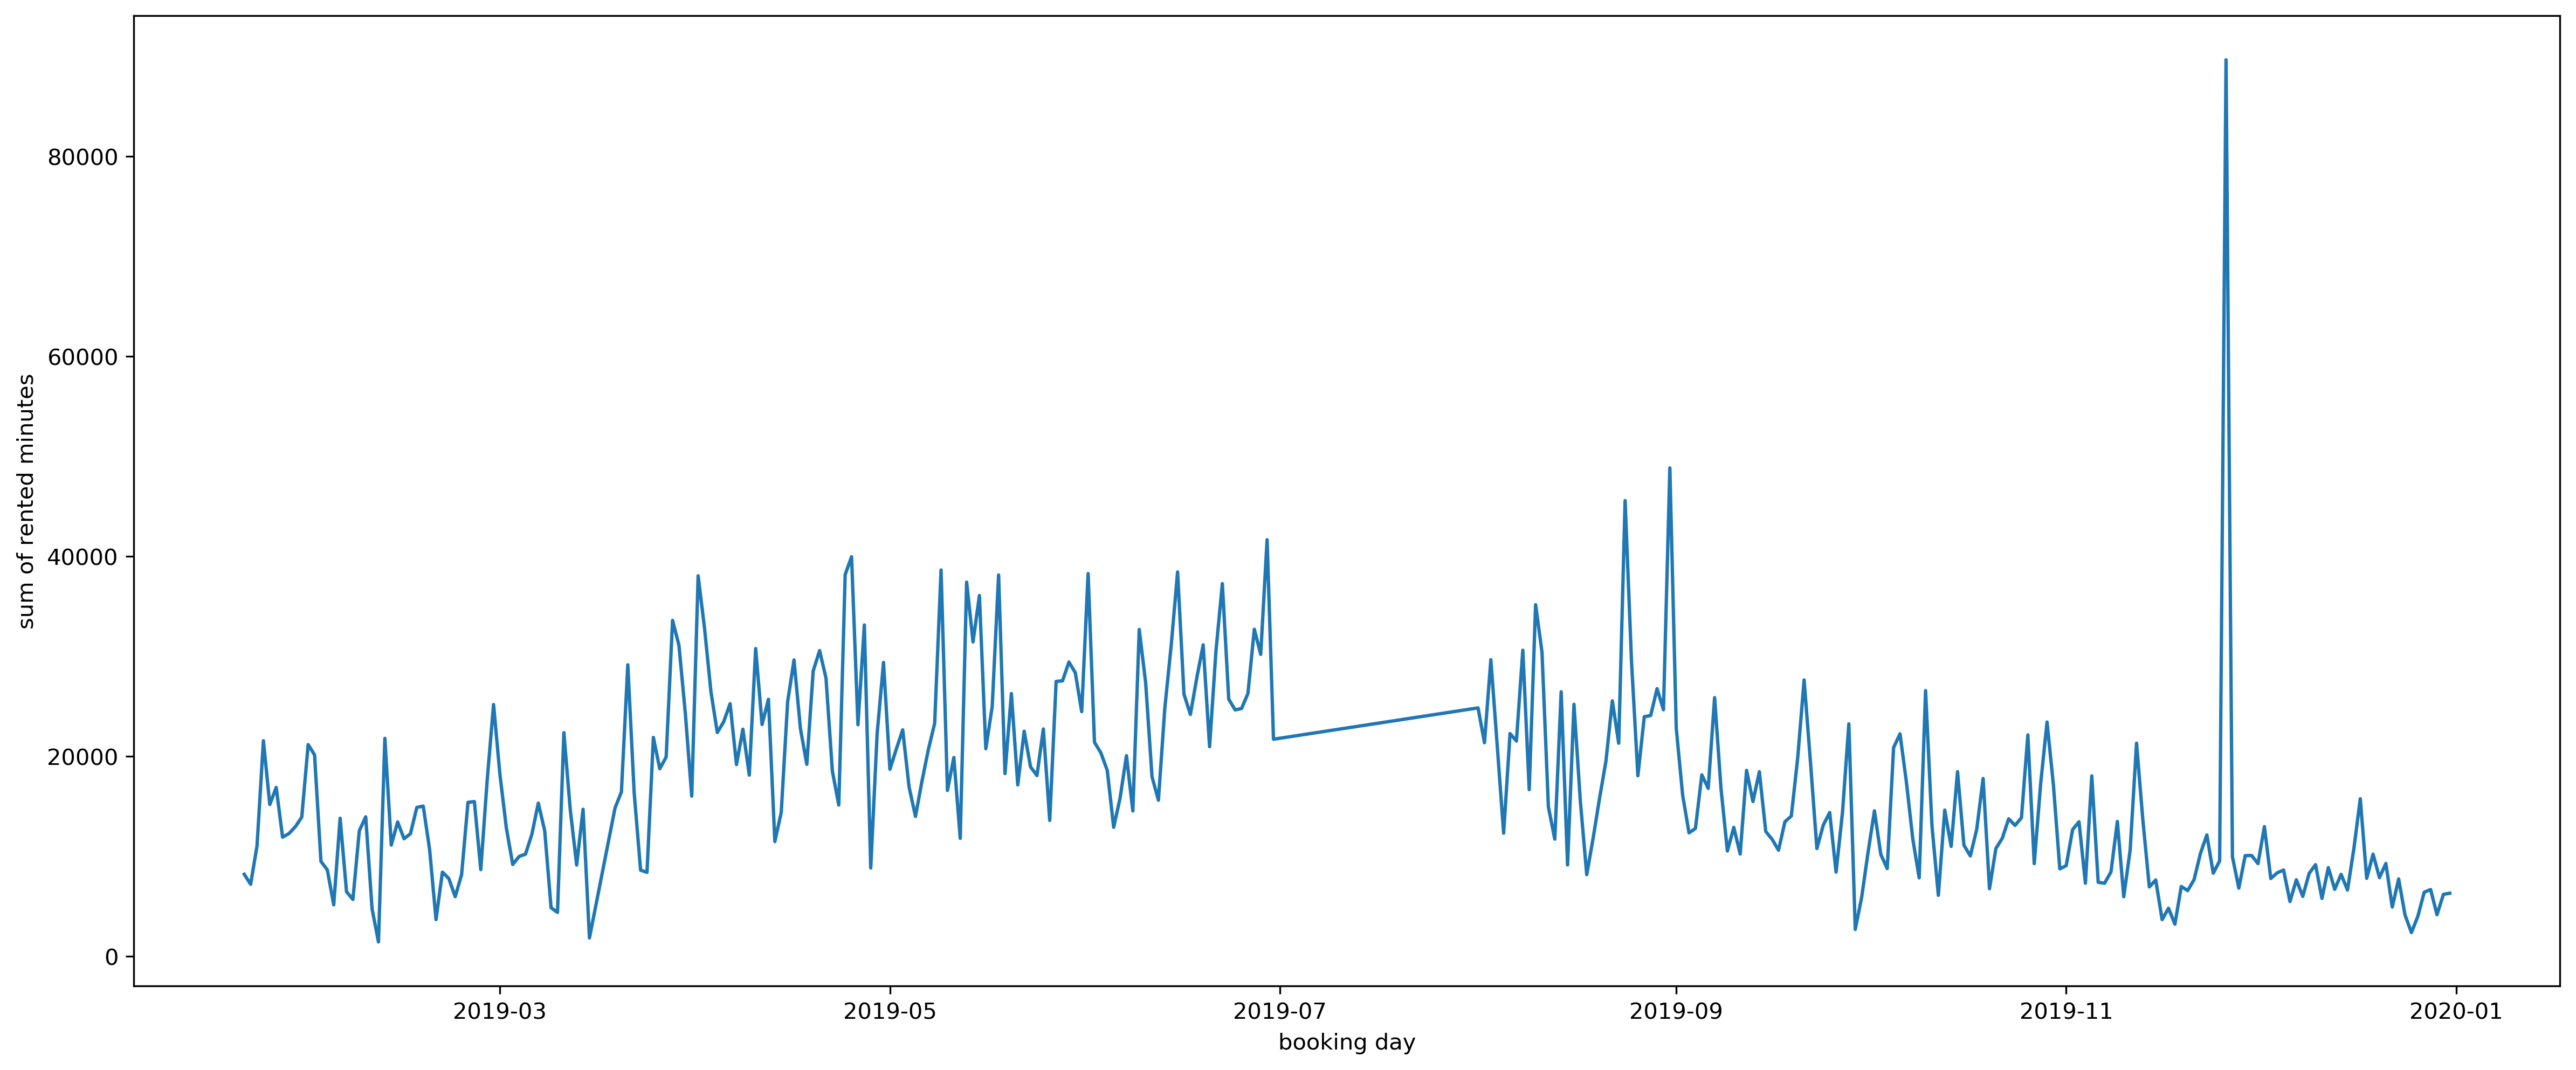

In [110]:
#display trips, so we can see a trend:
lineplot(sub_day_rented_minutes2,"booking day", "sum of rented minutes", "sub_day_rented_minutes2" )
lineplot(sub_day_rented_minutes3,"booking day", "sum of rented minutes","sub_day_rented_minutes3" )
lineplot(sub_day_rented_minutes,"booking day", "sum of rented minutes", "sub_day_rented_minutes" )



# Analyzing trip duration on average

In [111]:
# rented minutes on average per day
avg_rented_minutes = (bremen_trips.groupby('booking_date')
                                 .duration_min.mean()
                              )
avg_rented_minutes.describe().astype(int)

count     312
mean      287
std       522
min        13
25%        77
50%       144
75%       269
max      5187
Name: duration_min, dtype: int64

Here, on the total bremen trip dataset the standard deviation is again nearly  twice as big as the mean

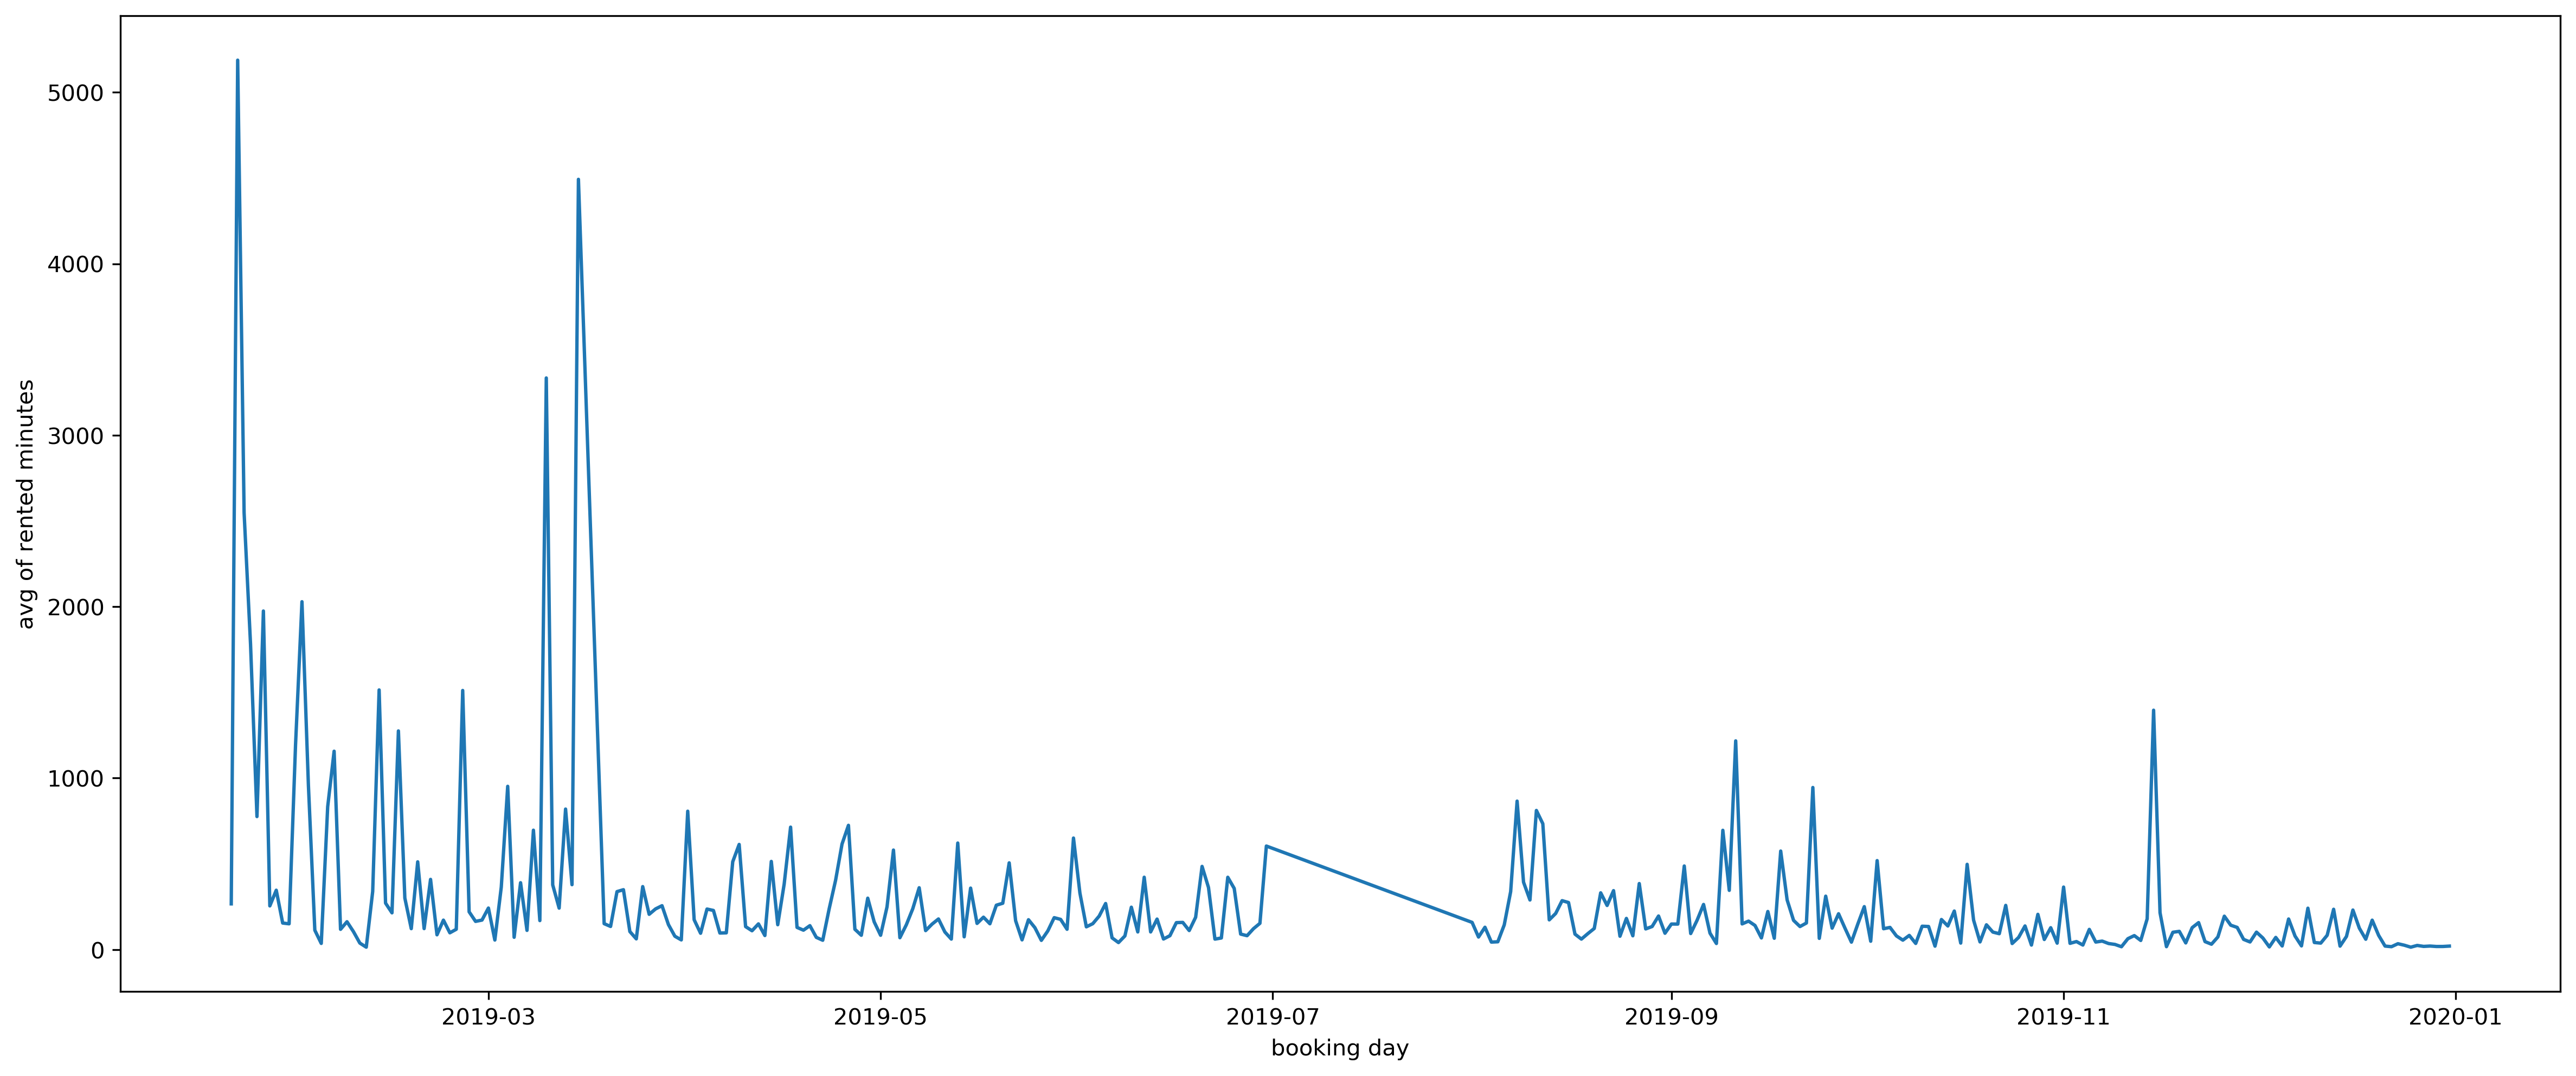

In [112]:
lineplot(avg_rented_minutes,'booking day','avg of rented minutes',"avg_rented_minutes" )

In [113]:
# rented minutes on average per day < 1500

avg_rented_minutes_1500 = avg_rented_minutes[avg_rented_minutes < 1500]
avg_rented_minutes_1500 = (avg_rented_minutes_1500.groupby('booking_date')
                                 .mean()
                              )
avg_rented_minutes_1500.describe().astype(int)

count     303
mean      215
std       231
min        13
25%        75
50%       140
75%       255
max      1396
Name: duration_min, dtype: int64

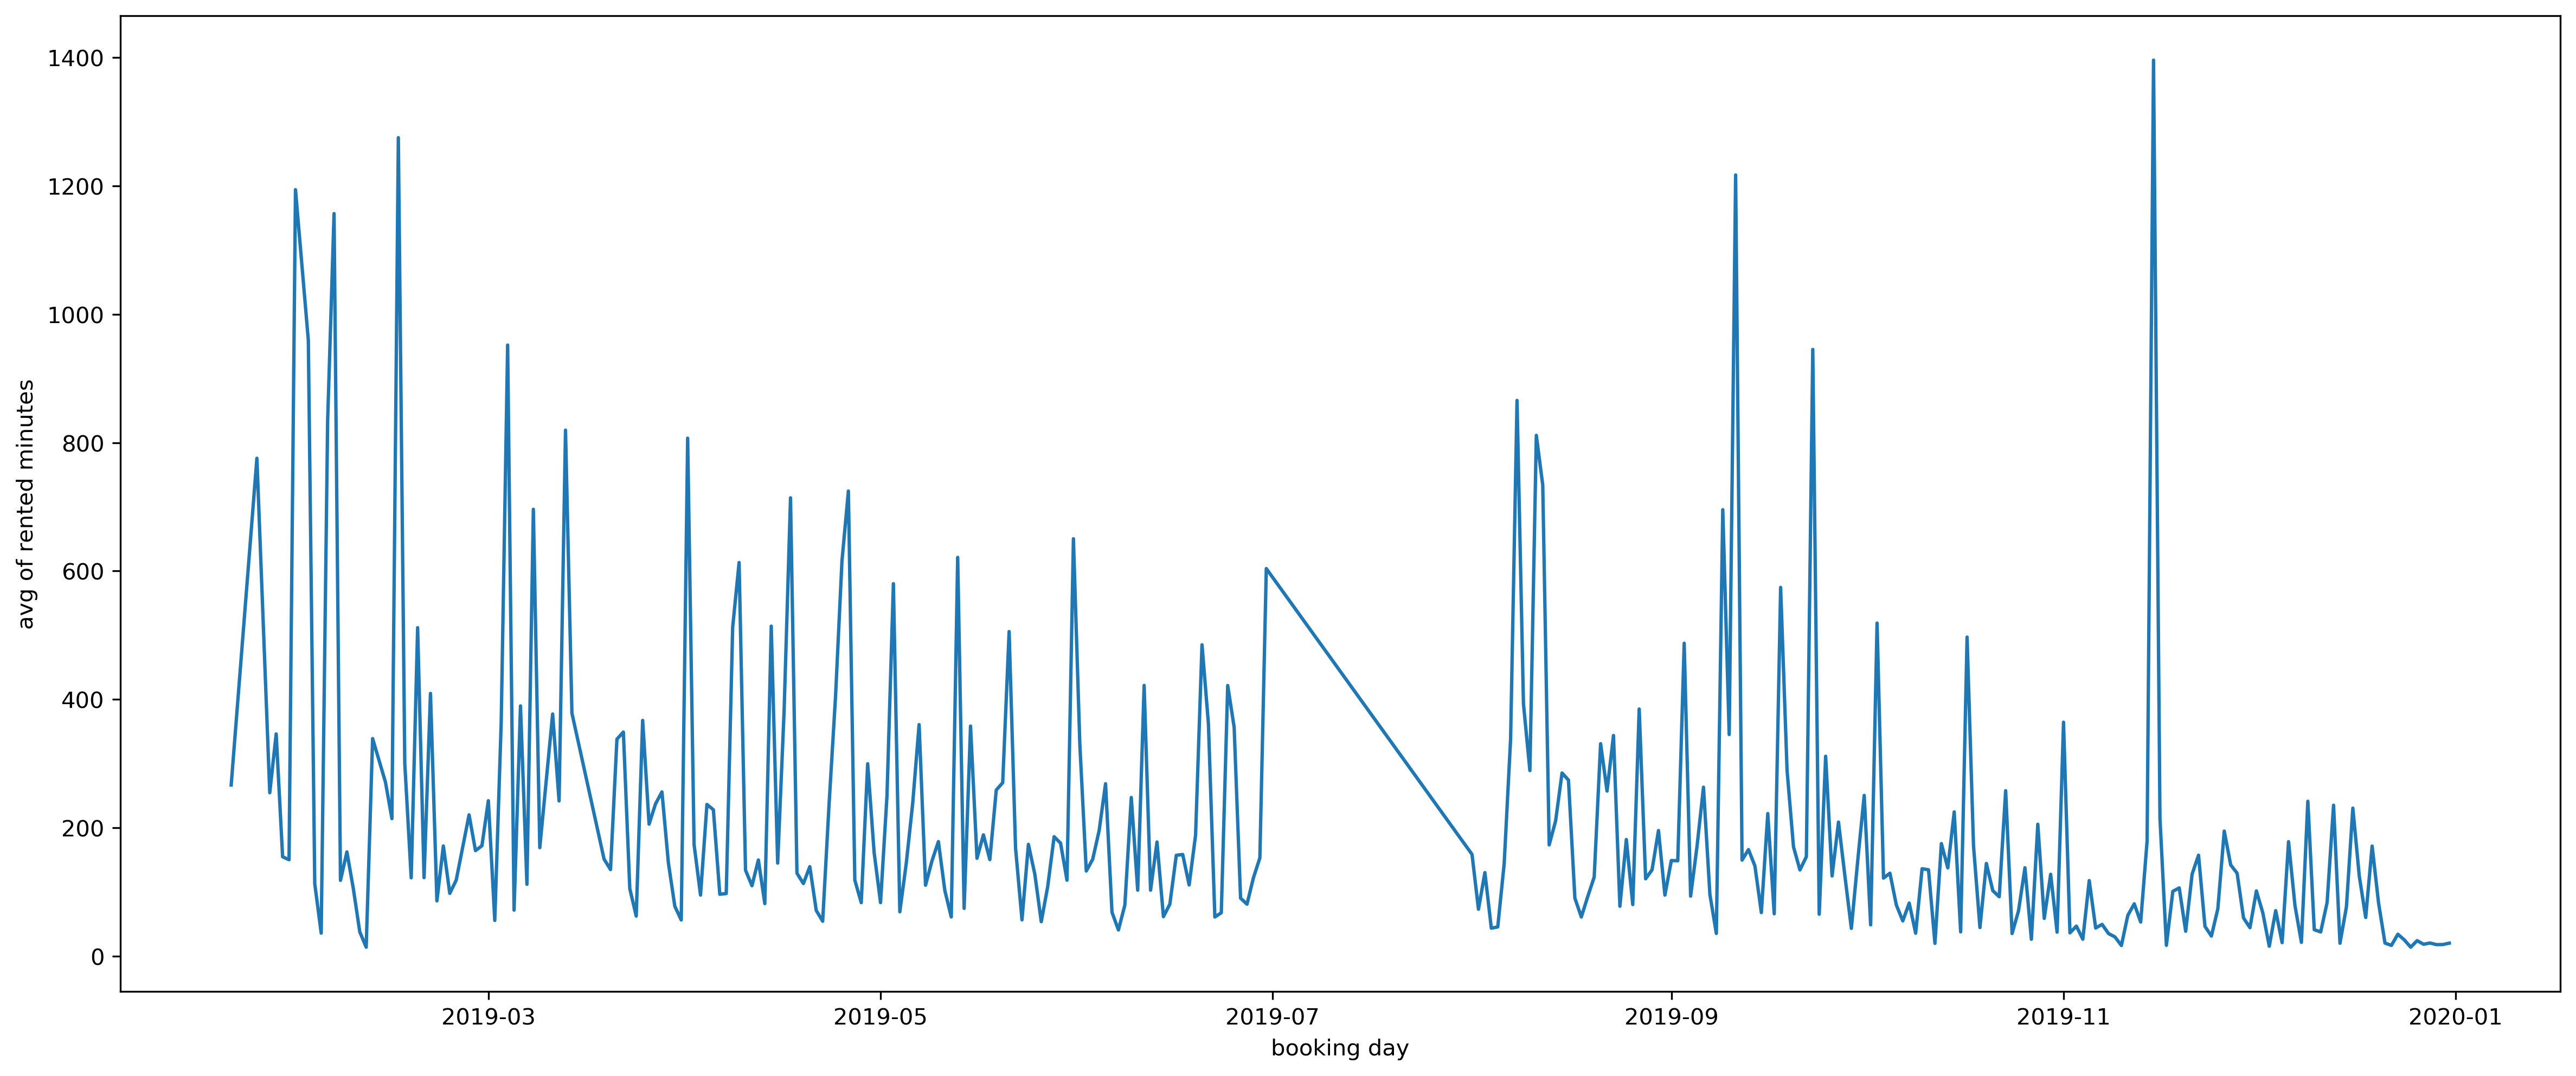

In [114]:
lineplot(avg_rented_minutes_1500,'booking day','avg of rented minutes',"avg_rented_minutes_1500" )

In [115]:
avg_rented_minutes_800 = avg_rented_minutes[avg_rented_minutes < 800]
avg_rented_minutes_800 = (avg_rented_minutes_800.groupby('booking_date')
                                 .mean()
                              )
avg_rented_minutes_800.describe().astype(int)

count    290
mean     179
std      154
min       13
25%       72
50%      134
75%      237
max      775
Name: duration_min, dtype: int64

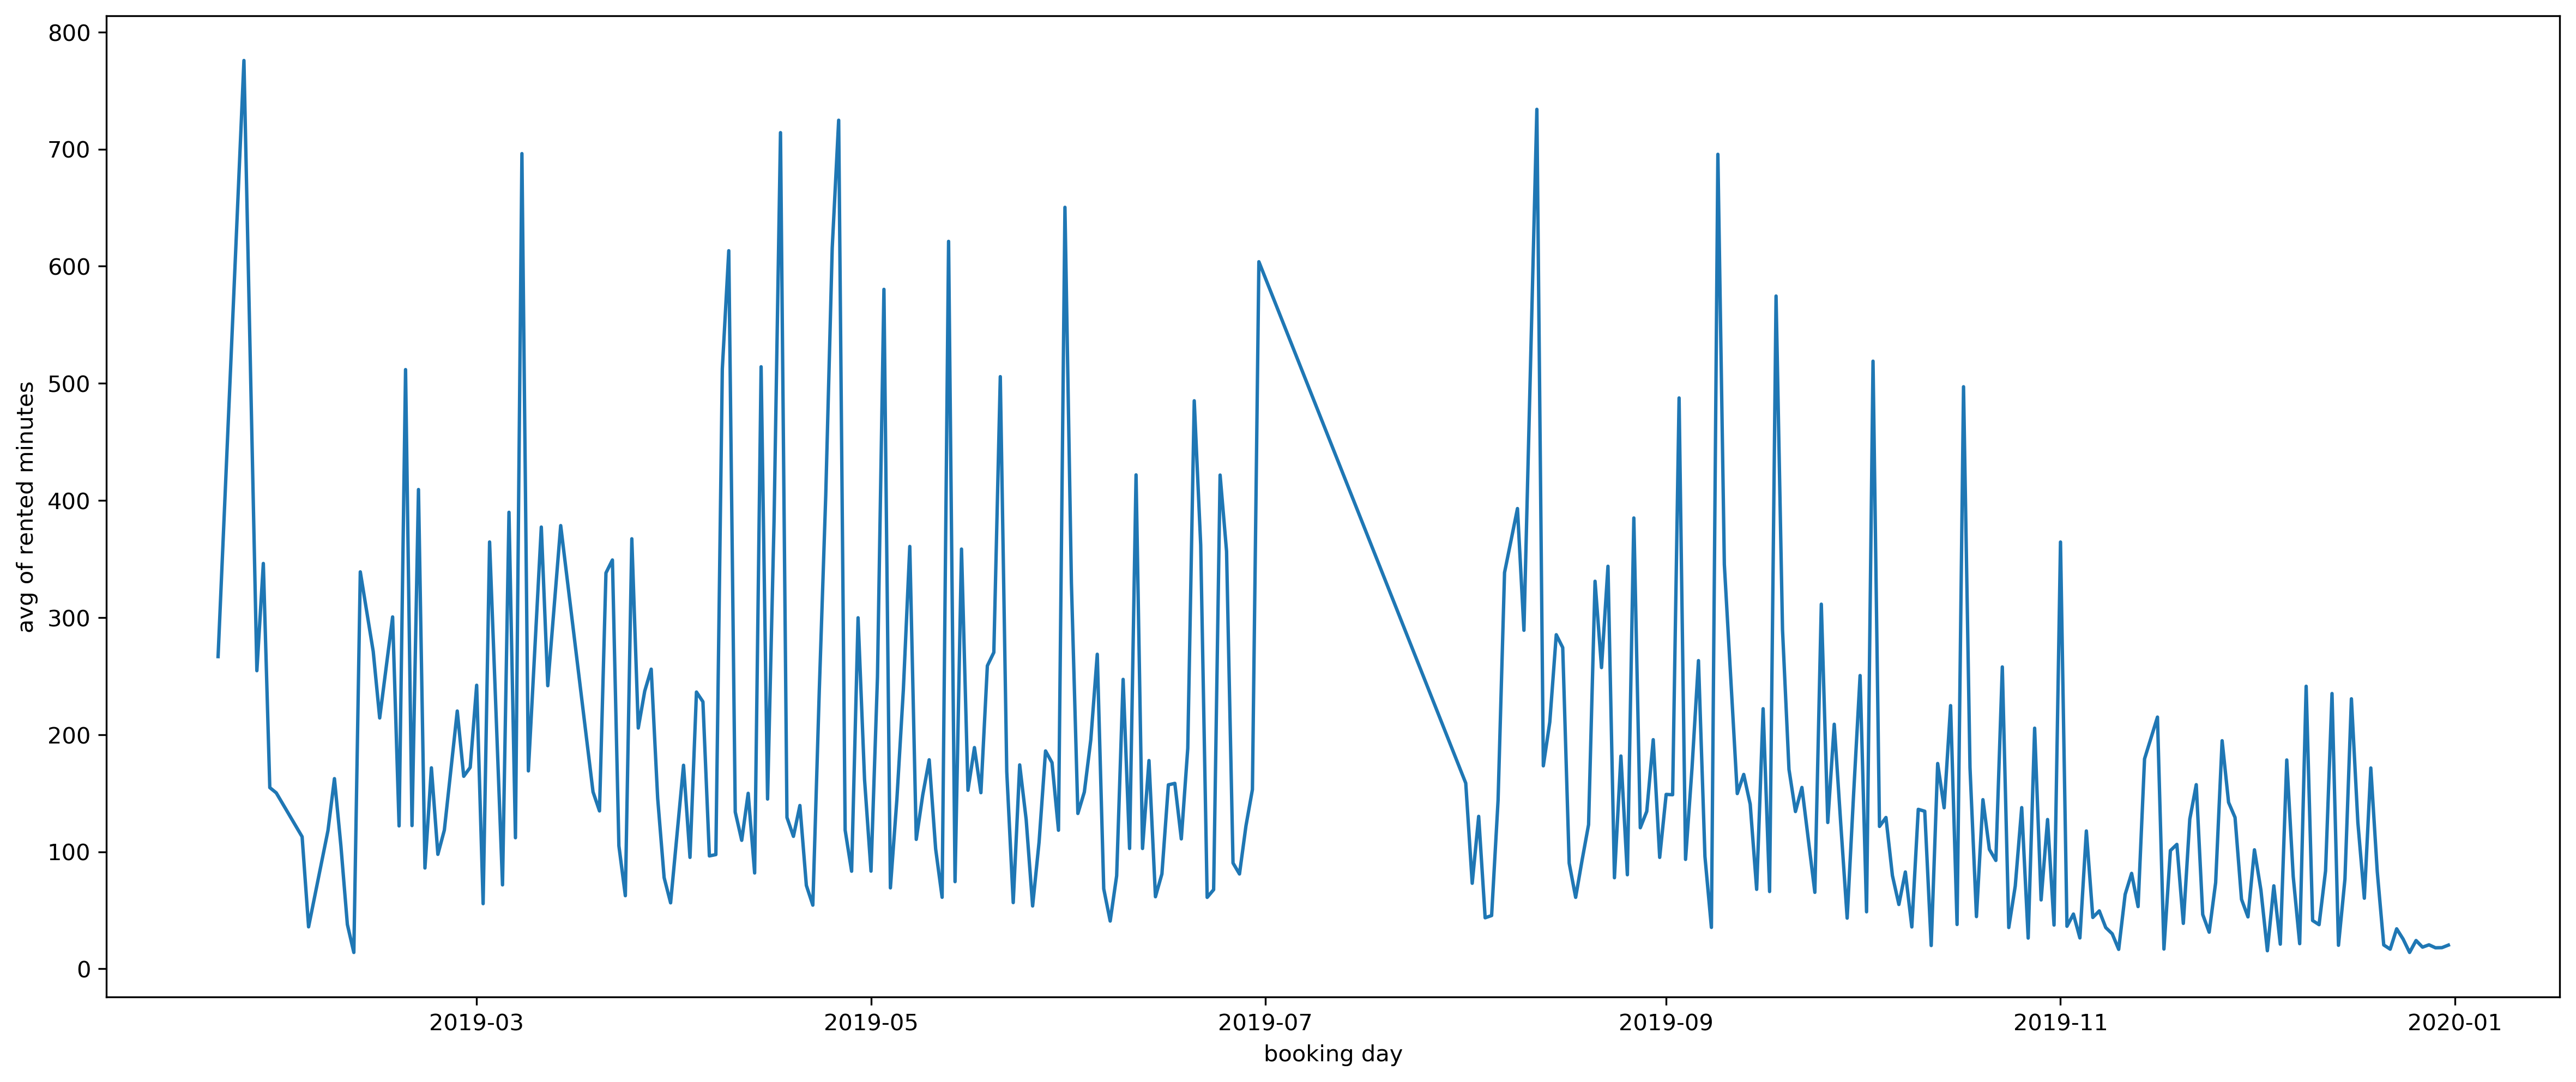

In [116]:
lineplot(avg_rented_minutes_800,'booking day','avg of rented minutes',"avg_rented_minutes_1500" )

The average trip duration seems to be independent from seasons.

# Number of bookings per day

In [117]:
# demand daily bookings dataset bremen trips
day_bookings_trips= (bremen_trips.groupby("booking_date").booking_date.count())
day_bookings_trips.describe().astype(int)

count     312
mean      460
std       165
min        84
25%       347
50%       465
75%       567
max      1016
Name: booking_date, dtype: int64

The mean and median don't differ as much as compared to trip duration.

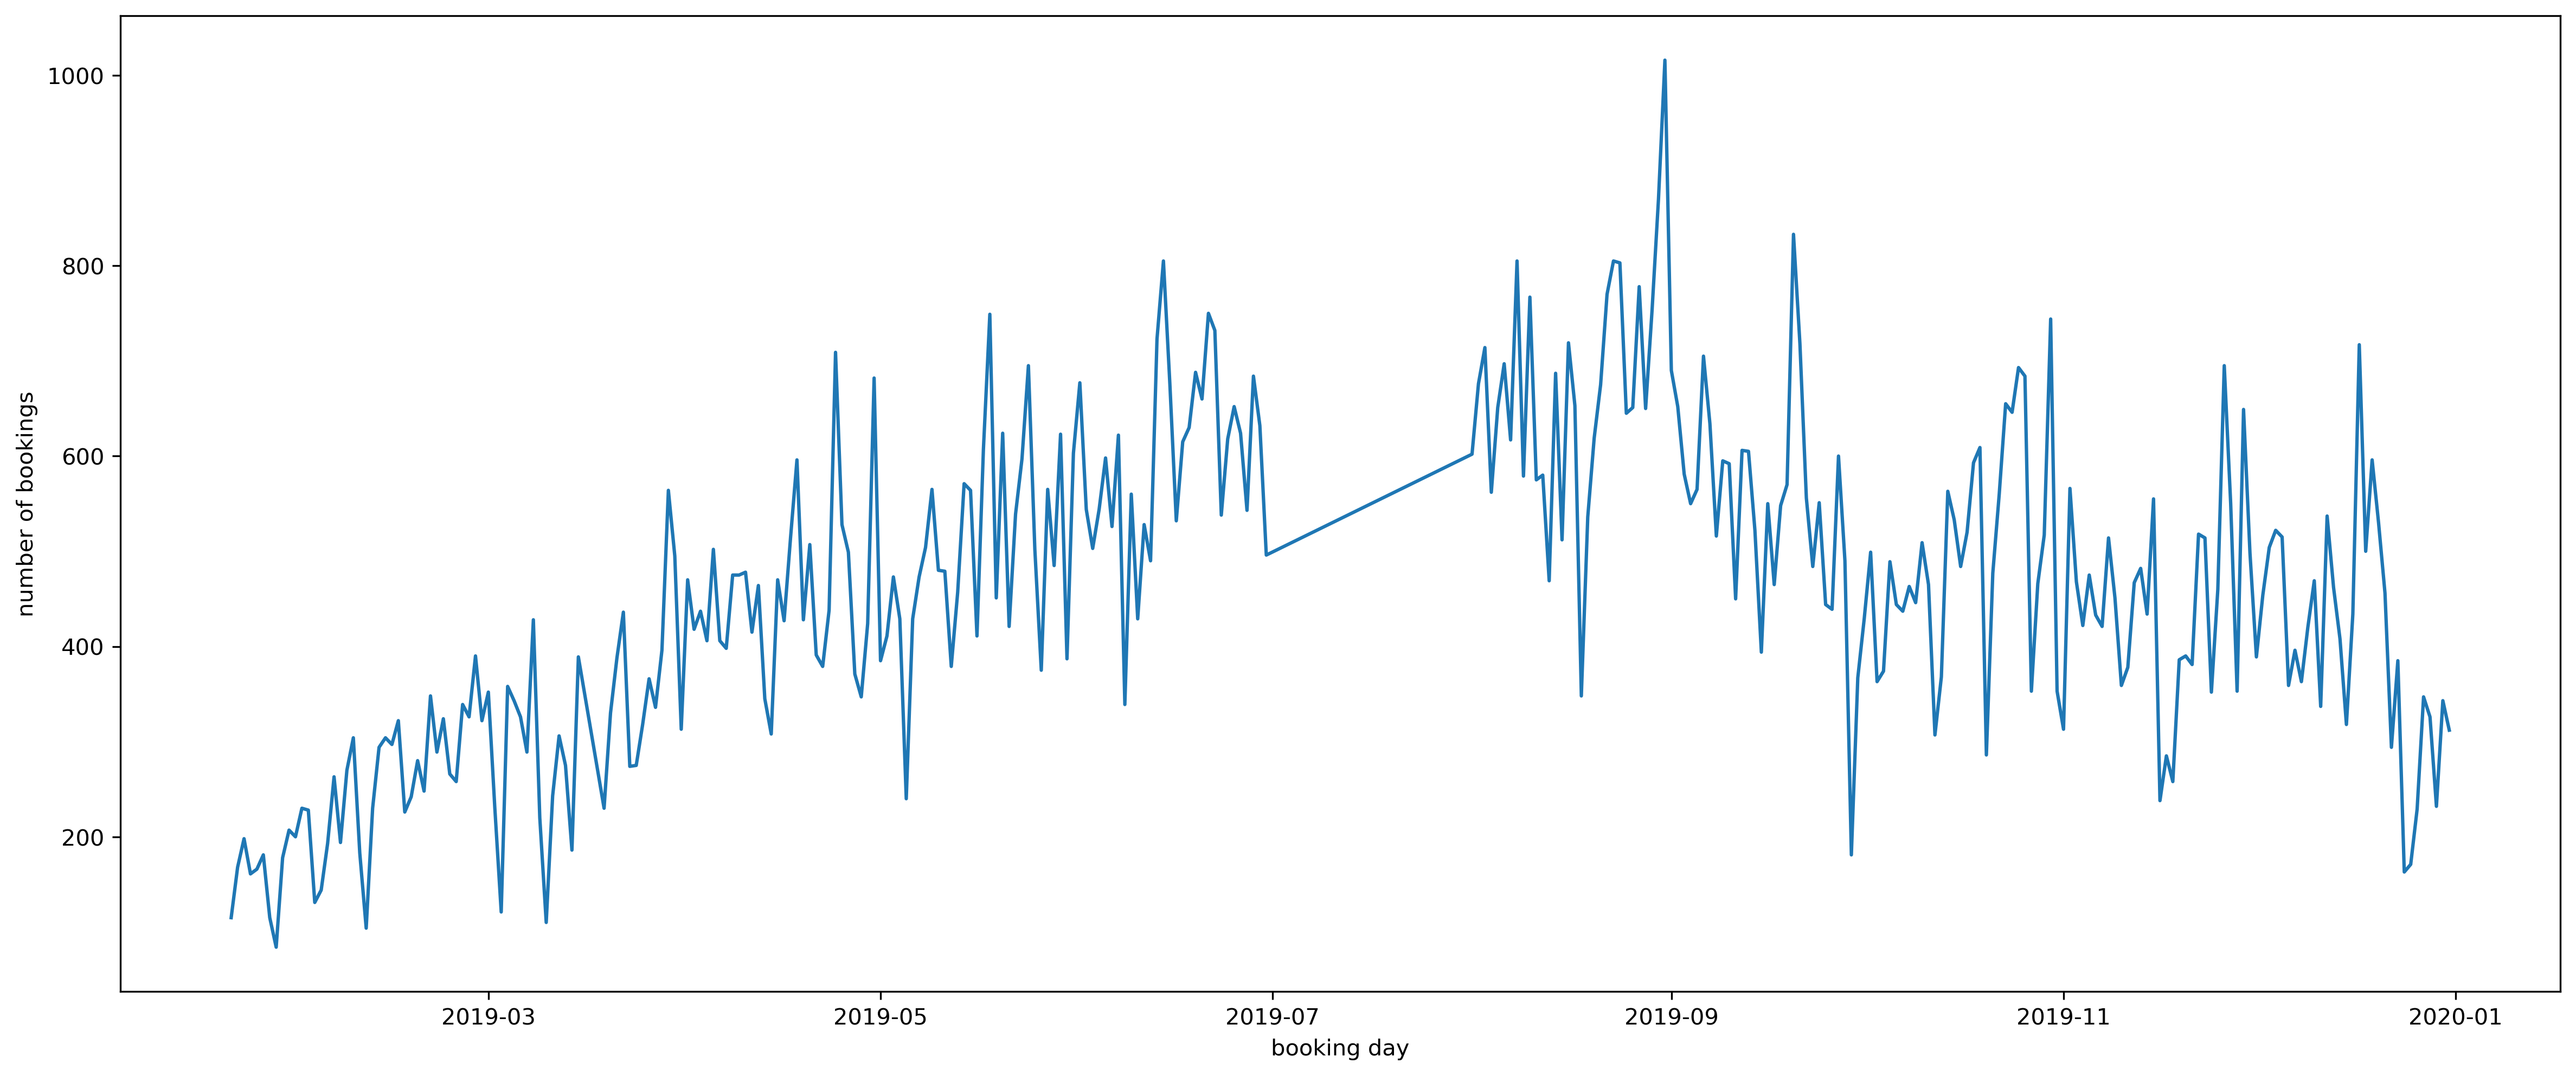

In [118]:
#Lineplot daily demand bookings: dataset bremen trips
lineplot(day_bookings_trips,"booking day","number of bookings", "day_bookings_trips" )

In [119]:
sub_day_bookings_trips = day_bookings_trips[day_bookings_trips < 2000]

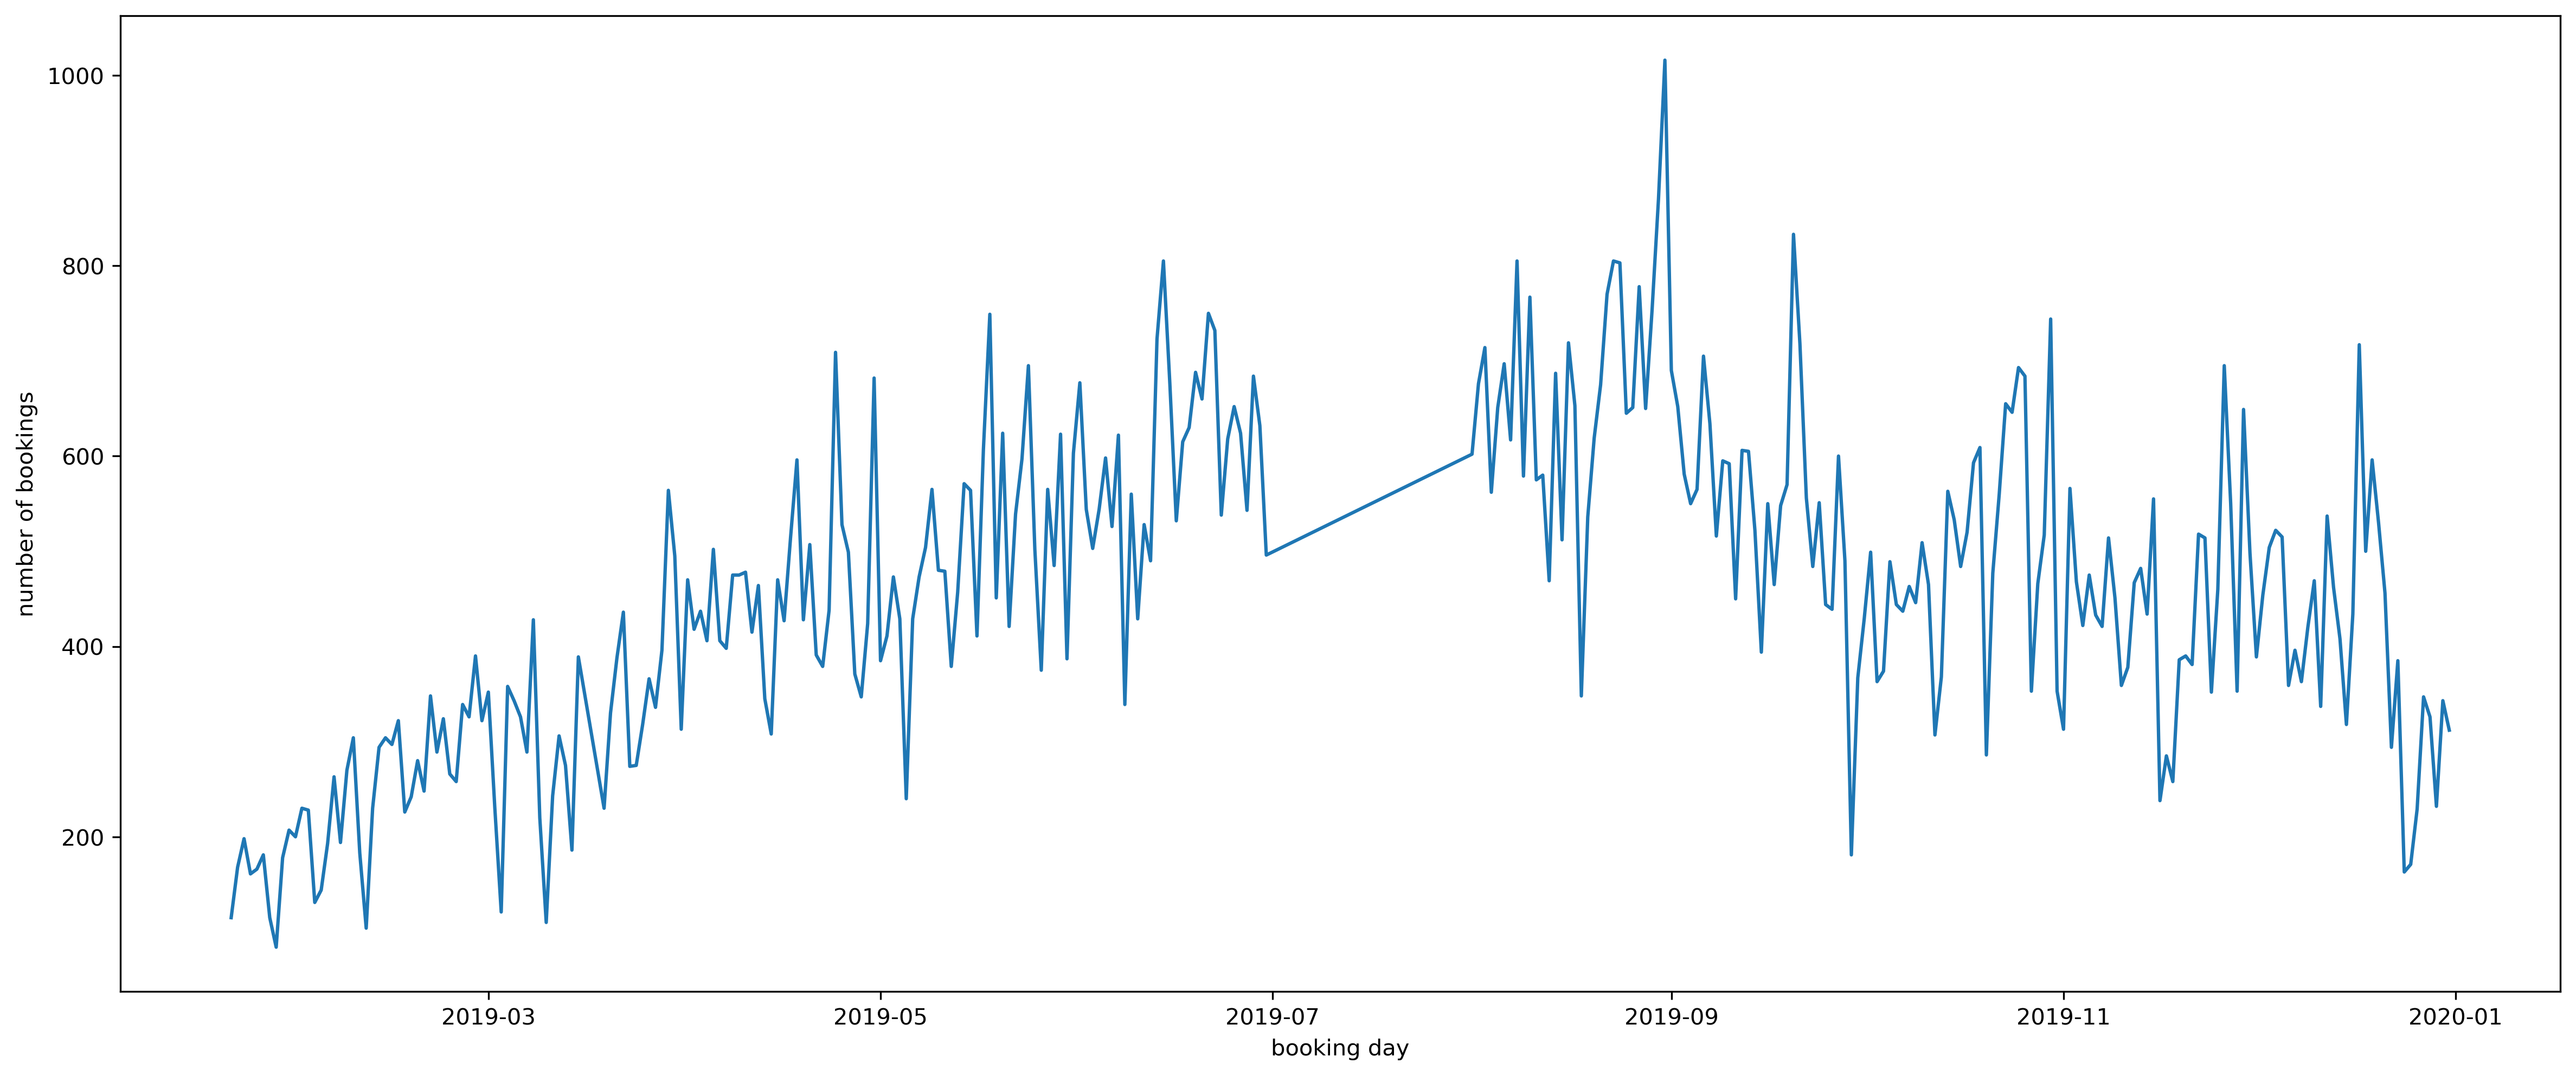

In [120]:
lineplot(sub_day_bookings_trips,"booking day","number of bookings", "sub_day_bookings_trips" )

We can see a seasonal trend. During the summer months we have more bookings as compared to winter

# Analyzing trip duration for different time frames

In [121]:
#Sum rented minutes a month
month_rented_minutes = (bremen_trips.groupby('month')
                                 .duration_min.sum()
                              )
month_rented_minutes.describe().astype(int)

count         11
mean     3252512
std      1221422
min       983674
25%      2535098
50%      3389328
75%      4079748
max      5091786
Name: duration_min, dtype: int64

Here we see that a whole month is missing. Mean and median do not differ so much. Standard deviation is way smaller than mean. It is interesting to see, that the statistics look different when analyzing the trip duration monthly and not totally.

In [122]:
month_rented_minutes # july is missing

month
1     3001789.0
2     3144893.0
3     4498053.0
4     3913153.0
5     3389328.0
6     3541826.0
8     5091786.0
9     4246344.0
10    2068407.0
11    1898380.0
12     983674.0
Name: duration_min, dtype: float64

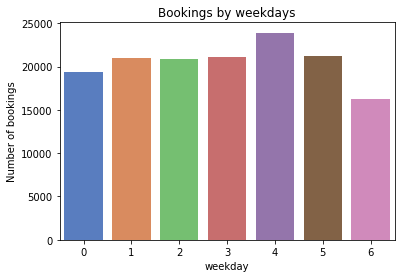

In [123]:
#Number of bookings by days of the week
weekdays = bremen_trips.groupby("weekdays").start_time.count()
weekdays
ax = sns.barplot(x=weekdays.index, y=weekdays, palette="muted")
ax.set(ylabel='Number of bookings', xlabel='weekday')
ax.set_title('Bookings by weekdays')
plt.savefig("../pictures/bookings_by_weekdays.png", dpi = 300)

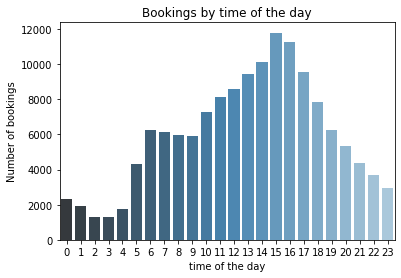

In [124]:
#Number of bookings by time
hour_day = bremen_trips.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_day.index, y=hour_day, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Bookings by time of the day')
plt.savefig("../pictures/bookings_by_time_otd.png", dpi = 300)

It is hard to make out a typical rushhour from 7-9 or 16-18 o'clock. The peaks differ from that. It would be interesting to find out, were those trips are going the most to (maybe schools or universities)

Text(0.5, 1.0, 'Number of bookings by time of the day and weekday')

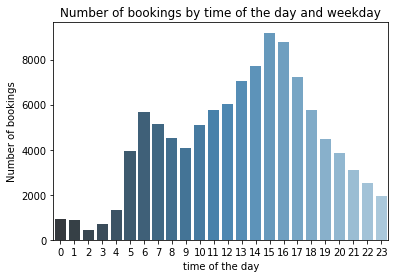

In [125]:
#Number of bookings by time of the day and weekday
weekdays_group = bremen_trips[bremen_trips["weekdays"] < 5]
hour_of_day__weekday = weekdays_group.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_of_day__weekday.index, y=hour_of_day__weekday, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Number of bookings by time of the day and weekday')

We can see a quite early "rushhour" from 6am to 7am and 14pm to 17pm.

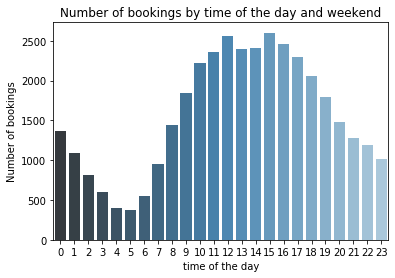

In [126]:
#Number of bookings by time and weekend 
weekend_group = bremen_trips[bremen_trips["weekdays"] > 4]
hour_of_day_weekend = weekend_group.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_of_day_weekend.index, y=hour_of_day_weekend, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Number of bookings by time of the day and weekend')
plt.savefig("../pictures/bookings_by_time_otd_weekend.png", dpi = 300)


When we compare this graph to weekdays, we see that less bikes are rented on the weekend (y axis: 14.000 vs 4.000).

In [127]:
display(hour_day.describe(),hour_of_day__weekday.describe(),hour_of_day_weekend.describe())

count       24.000000
mean      5986.541667
std       3174.260968
min       1274.000000
25%       3528.250000
50%       6035.000000
75%       8232.750000
max      11794.000000
Name: start_time, dtype: float64

count      24.000000
mean     4422.083333
std      2573.575197
min       456.000000
25%      2378.000000
50%      4497.500000
75%      5844.500000
max      9193.000000
Name: start_time, dtype: float64

count      24.000000
mean     1564.458333
std       742.168678
min       377.000000
25%      1001.500000
50%      1460.500000
75%      2312.250000
max      2601.000000
Name: start_time, dtype: float64

When you compare the median you can clearly see that less bikes are rented at the weekend 

# Situational analysis

In [128]:
with open('../data/external/station_information.json') as json_file:
    data = json.load(json_file)
data = pd.DataFrame(data['data']['stations'])
data

station_id                                name short_name        lat  \
0     2351602           WESER-KURIER | Pressehaus       2910  53.076722   
1     7872668                           Am Dobben       2925  53.078194   
2     7872701                      Am Speicher XI       2926  53.097556   
3     7872739                  Bahnhof Blumenthal       2927  53.182889   
4     7872765                Bahnhof Bremen-Farge       2928  53.205417   
..        ...                                 ...        ...        ...   
78   16521413                   Irgendwo Festival       2920  53.057878   
79   17322575  Mondelez Deutschland Services GmbH       2921  53.091283   
80   17322791  Die Sparkasse Bremen Mühlenviertel       2922  53.101909   
81   17322858    Am Waller Strandpark Waller Sand       2923  53.103056   
82   29359657                        IKEA Brinkum       2924  53.027197   

         lon region_id  capacity  
0   8.803943       379       5.0  
1   8.823250       379       NaN  
2   8.770056       379       NaN  
3   8.580278       379       NaN  
4   8.517000       379       NaN  
..       ...       ...       ...  
78  8.786745       379       6.0  
79  8.775759       379       6.0  
80  8.880113       379       6.0  
81  8.753035       379       6.0  
82  8.803090       379       5.0  

[83 rows x 7 columns]

In [129]:
data.rename(
    columns={
        "short_name": "start_place",
        "name" :"start_name",
    },
    inplace=True
)

In [130]:
display(bremen_trips.info(), data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143677 entries, 50911 to 70657
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   bike            143677 non-null  int64         
 1   bike_type       143677 non-null  int64         
 2   identification  143677 non-null  int64         
 3   start_time      143677 non-null  datetime64[ns]
 4   end_time        143677 non-null  object        
 5   duration_sec    143677 non-null  float64       
 6   start_lng       143677 non-null  float64       
 7   start_lat       143677 non-null  float64       
 8   end_lng         143677 non-null  float64       
 9   end_lat         143677 non-null  float64       
 10  start_place     143677 non-null  float64       
 11  end_place       143677 non-null  float64       
 12  month           143677 non-null  int64         
 13  booking_date    143677 non-null  object        
 14  weekdays        143677 non-null  

None

None

In [131]:
#prepare for merge
bremen_trips["start_place"] = bremen_trips.start_place.astype(int)
data["start_place"] = data.start_place.astype(int)
bremen_trips["end_place"] = bremen_trips.end_place.astype(int)

data = data.sort_values(by=['start_place'], ascending=True)

columns = ["capacity", "region_id", "lon", "lat", "station_id"]
data = data.drop(columns, axis = 1)

In [132]:
data_start = data


In [133]:
data_start

start_name  start_place
0   WESER-KURIER | Pressehaus         2910
11           Flughafen Bremen         2911
38           Universum Bremen         2912
70    hanseWasser Bremen GmbH         2913
72               Messe Bremen         2914
..                        ...          ...
67      GEWOBA | Heideplatz 1         2989
61      KAEFER Isoliertechnik         2990
68              Waller Straße         2991
69  Caroline Henschel Strasse         2992
62             Uni Bremen TAB         2997

[83 rows x 2 columns]

In [134]:
bremen_trips = bremen_trips.sort_values(by=['start_place'], ascending=True)

In [135]:
station_information = pd.merge_asof(bremen_trips, data_start, on='start_place')


In [136]:
station_information

bike  bike_type  identification          start_time  \
0       20685         71        12099440 2019-01-20 00:13:00   
1       20715         71        21721218 2019-09-08 21:22:00   
2       20805         71        21721351 2019-09-08 21:21:00   
3       20589         71        21721340 2019-09-08 21:15:00   
4       20886         71        21721407 2019-09-08 21:11:00   
...       ...        ...             ...                 ...   
143672  20706         71        12898800 2019-02-21 18:29:00   
143673  20932         71         7873805 2019-02-20 21:08:00   
143674  20798         71        12576016 2019-02-07 21:10:00   
143675  20720         71        12393020 2019-02-01 08:53:00   
143676  20837         71         7873210 2019-02-05 07:56:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
0       2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
1       2019-09-08 21:30:00         480.0   8.816283  53.084227  8.826773   
2       2019-09-08 21:36:00         900.0   8.803018  53.075676  8.798297   
3       2019-09-08 21:36:00        1260.0   8.800266  53.078213  8.798243   
4       2019-09-08 21:39:00        1680.0   8.796773  53.086418  8.814825   
...                     ...           ...        ...        ...       ...   
143672  2019-02-21 18:46:00        1020.0   8.860495  53.109130  8.841651   
143673  2019-02-20 21:43:00        2100.0   8.860495  53.109130  8.799639   
143674  2019-02-07 21:37:00        1620.0   8.860495  53.109130  8.813565   
143675  2019-02-01 09:02:00         540.0   8.860495  53.109130  8.849726   
143676  2019-02-07 13:35:00      193140.0   8.860495  53.109130  8.793556   

          end_lat  start_place  end_place  month booking_date  weekdays  \
0       53.084196            0          0      1   2019-01-20         6   
1       53.082627            0          0      9   2019-09-08         6   
2       53.057058            0          0      9   2019-09-08         6   
3       53.057089            0          0      9   2019-09-08         6   
4       53.084387            0          0      9   2019-09-08         6   
...           ...          ...        ...    ...          ...       ...   
143672  53.083409        29860          0      2   2019-02-21         3   
143673  53.069444        29860       2962      2   2019-02-20         2   
143674  53.082391        29860          0      2   2019-02-07         3   
143675  53.095022        29860          0      2   2019-02-01         4   
143676  53.066556        29860       2941      2   2019-02-05         1   

        duration_min      start_name  
0               10.0             NaN  
1                8.0             NaN  
2               15.0             NaN  
3               21.0             NaN  
4               28.0             NaN  
...              ...             ...  
143672          17.0  Uni Bremen TAB  
143673          35.0  Uni Bremen TAB  
143674          27.0  Uni Bremen TAB  
143675           9.0  Uni Bremen TAB  
143676        3219.0  Uni Bremen TAB  

[143677 rows x 17 columns]

In [137]:
data_end = data
data_end.rename(
    columns={
        "start_place": "end_place",
        "start_name" :"end_name",
    },
    inplace=True
)

In [138]:
station_information = pd.merge_asof(station_information.sort_values(by=['end_place'], ascending=True), data_end, on='end_place')

In [139]:
station_information = station_information.sort_values(by=['start_time'], ascending=True)

In [140]:
station_information.head()

bike  bike_type  identification          start_time  \
0       20685         71        12099440 2019-01-20 00:13:00   
127375  20935         71         7873316 2019-01-20 00:35:00   
12776   20617         71        12099749 2019-01-20 00:40:00   
12806   20795         71        12099872 2019-01-20 00:47:00   
12807   20927         71        12100199 2019-01-20 01:07:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
0       2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
127375  2019-01-25 08:00:00      458700.0   8.816798  53.072448  8.811472   
12776   2019-01-20 00:44:00         240.0   8.801623  53.067878  8.793217   
12806   2019-01-20 00:54:00         420.0   8.814744  53.084841  8.801135   
12807   2019-01-20 01:15:00         480.0   8.815254  53.084302  8.806666   

          end_lat  start_place  end_place  month booking_date  weekdays  \
0       53.084196            0          0      1   2019-01-20         6   
127375  53.083167            0       2946      1   2019-01-20         6   
12776   53.064244            0          0      1   2019-01-20         6   
12806   53.094596            0          0      1   2019-01-20         6   
12807   53.094964            0          0      1   2019-01-20         6   

        duration_min start_name                       end_name  
0               10.0        NaN                            NaN  
127375        7645.0        NaN  Hauptbahnhof / Übersee Museum  
12776            4.0        NaN                            NaN  
12806            7.0        NaN                            NaN  
12807            8.0        NaN                            NaN

In [141]:
#most used start_place
#pd.set_option("display.max.rows", bremen_trips.shape[0]+1)
station_information.start_name.value_counts()


Hauptbahnhof / Übersee Museum    4679
WESER-KURIER | Pressehaus        1674
GOP / Steigenberger              1152
Uni Bremen                        899
Haltestelle Wartburgstraße        806
                                 ... 
Bahnhof Mahndorf                   46
Bahnhof Vegesack                   44
Irgendwo Festival                  30
Bahnhof Blumenthal                 18
Bahnhof Bremen-Farge               14
Name: start_name, Length: 76, dtype: int64

The first three stations are very central or the main station. On the 4th place we have the university.

In [142]:
#most used end_place
station_information.end_name.value_counts()

Hauptbahnhof / Übersee Museum    4129
WESER-KURIER | Pressehaus        1432
GOP / Steigenberger              1057
Uni Bremen                        849
Haltestelle Wartburgstraße        763
                                 ... 
Bahnhof Mahndorf                   37
Bahnhof Vegesack                   35
Irgendwo Festival                  27
Bahnhof Blumenthal                 19
Bahnhof Bremen-Farge               13
Name: end_name, Length: 76, dtype: int64

In [143]:
#most popular roads: start_place to end_place
most_pr = (
    station_information.groupby(['start_name', 'end_name'])
      .agg({'duration_min':['count','min','max','mean','median','std','var']})
      .reset_index().sort_values(('duration_min','count'), ascending=False)
)
most_pr.head(n=20)



start_name                            end_name  \
                                                                               
595                  GOP / Steigenberger       Hauptbahnhof / Übersee Museum   
926        Hauptbahnhof / Übersee Museum           WESER-KURIER | Pressehaus   
1736           WESER-KURIER | Pressehaus       Hauptbahnhof / Übersee Museum   
1290  Mondelez Deutschland Services GmbH       Hauptbahnhof / Übersee Museum   
890        Hauptbahnhof / Übersee Museum                 GOP / Steigenberger   
808           Haltestelle Wartburgstraße                    Flughafen Bremen   
1845                 Woltmershauser Str.       Hauptbahnhof / Übersee Museum   
912        Hauptbahnhof / Übersee Museum  Mondelez Deutschland Services GmbH   
1472                Pusdorfer Marktplatz                      Landmark-Tower   
905        Hauptbahnhof / Übersee Museum                   Konsul-Smidt-Str.   
1077                   Konsul-Smidt-Str.       Hauptbahnhof / Übersee Museum   
1155                      Landmark-Tower                Pusdorfer Marktplatz   
1148                      Landmark-Tower       Hauptbahnhof / Übersee Museum   
1910             hanseWasser Bremen GmbH       Hauptbahnhof / Übersee Museum   
639                Gottfried-Menken-Str.                    Universum Bremen   
884        Hauptbahnhof / Übersee Museum                           Domsheide   
675                  Haltestelle Am Wall       Hauptbahnhof / Übersee Museum   
882        Hauptbahnhof / Übersee Museum           Caroline Henschel Strasse   
713         Haltestelle Borgfelder Allee                       Wümme-Zeitung   
212                        Bahnhof Walle                      Am Speicher XI   

     duration_min                                                    \
            count   min       max         mean median           std   
595           131   7.0   61892.0   633.091603   11.0   5431.124998   
926           123   5.0    1328.0    45.569106    8.0    166.661190   
1736          105   5.0  286473.0  3741.409524    8.0  28333.075564   
1290           93  11.0   10209.0   126.182796   15.0   1056.921308   
890            80   8.0    2287.0    75.150000   10.0    310.468331   
808            71  19.0      36.0    27.718310   27.0      2.752573   
1845           64   3.0  342573.0  9107.781250  871.5  44804.374625   
912            62  12.0     544.0    24.419355   15.0     67.176193   
1472           58  17.0     521.0    38.344828   23.0     80.336693   
905            58  11.0    5556.0   130.741379   15.0    734.628216   
1077           53  11.0   22740.0  1072.490566   15.0   4352.149944   
1155           50  17.0    1615.0    93.380000   23.0    277.432903   
1148           50  16.0    4199.0   162.720000   21.0    684.314048   
1910           50  14.0    1126.0    42.540000   18.0    157.106646   
639            50  26.0    4841.0   227.000000   29.0    900.297411   
884            46   5.0    3941.0   104.695652    8.0    579.231440   
675            46   5.0    8313.0   283.804348    6.0   1245.926636   
882            45  14.0     663.0    41.244444   21.0     96.485551   
713            43   9.0    2418.0   190.697674   12.0    545.184396   
212            43   6.0      16.0     9.627907    9.0      1.690636   

                    
               var  
595   2.949712e+07  
926   2.777595e+04  
1736  8.027632e+08  
1290  1.117083e+06  
890   9.639058e+04  
808   7.576660e+00  
1845  2.007432e+09  
912   4.512641e+03  
1472  6.453984e+03  
905   5.396786e+05  
1077  1.894121e+07  
1155  7.696902e+04  
1148  4.682857e+05  
1910  2.468250e+04  
639   8.105354e+05  
884   3.355091e+05  
675   1.552333e+06  
882   9.309462e+03  
713   2.972260e+05  
212   2.858250e+00

Mondelez is a housing company, who cooperates with WK-Bikes: https://www.weser-kurier.de/bremen/stadtteile/stadtteile-bremen-sued_artikel,-wkbikes-werden-mit-fotovoltaik-ausgestattet-_arid,1848221.html

In [144]:
# Most popular zones
station_information.start_name.value_counts()
df_origin_freq = station_information.start_name.value_counts().reset_index()
df_origin_freq.rename(
    columns={
        "index": "rental_zone",
        "start_name": "start",
    },
    inplace=True
)
df_origin_freq
df_origin_freq.columns = ['rental_zone','start']
df_dest_freq = station_information.end_name.value_counts().reset_index()
df_dest_freq.rename(
    columns={
        "index": "rental_zone",
        "start_place": "end",
    },
    inplace=True
)
df_dest_freq.columns = ['rental_zone','end']

popular_zones_merged = pd.merge(df_origin_freq, df_dest_freq, on='rental_zone')
popular_zones_merged['diff'] = popular_zones_merged.end - popular_zones_merged.start
popular_zones_merged

rental_zone  start   end  diff
0   Hauptbahnhof / Übersee Museum   4679  4129  -550
1       WESER-KURIER | Pressehaus   1674  1432  -242
2             GOP / Steigenberger   1152  1057   -95
3                      Uni Bremen    899   849   -50
4      Haltestelle Wartburgstraße    806   763   -43
..                            ...    ...   ...   ...
71               Bahnhof Mahndorf     46    37    -9
72               Bahnhof Vegesack     44    35    -9
73              Irgendwo Festival     30    27    -3
74             Bahnhof Blumenthal     18    19     1
75           Bahnhof Bremen-Farge     14    13    -1

[76 rows x 4 columns]

Here you see, that at "Hauptbahnhof / Übersee Museum" more trips are starting than ending.

In [145]:
# High bicycle demand
popular_zones_merged.sort_values('diff').head()

rental_zone  start   end  diff
0   Hauptbahnhof / Übersee Museum   4679  4129  -550
1       WESER-KURIER | Pressehaus   1674  1432  -242
21          Gottfried-Menken-Str.    492   342  -150
36        Theater am Leibnizplatz    389   261  -128
15       Haltestelle Gastfeldstr.    609   483  -126

In [146]:
# High bicycle supply
popular_zones_merged.sort_values('diff', ascending=False).head()

rental_zone  start  end  diff
47            Haltestelle Borgfelder Allee    257  261     4
37                   Meierei im Bürgerpark    372  376     4
66  Mühlenfeldstr. / Rockwinkeler Heerstr.    105  109     4
67       Haltestelle Lilienthal-Falkenberg     72   76     4
58              Karl-Marx-Str. / Ohserstr.    157  160     3

We can see, that few stations have too many bikes but there are stations where the demand is quite high, so that they may lack on bikes.